In [5]:
### block 1 ###
import math as m
import scipy.ndimage as nd
from matplotlib.pylab import plt
import cv2
import numpy as np
from glob import glob
from sklearn.cluster import KMeans
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt1
import shutil
import os
from sklearn.cluster import AgglomerativeClustering
from skimage.feature import blob_log
import csv
import codecs

from skimage import exposure
from numpy.fft import *
from sklearn.manifold import TSNE
import time
from matplotlib import interactive
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster,maxRstat,inconsistent,maxinconsts
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
# from kernel_kmeans import KernelKMeans

from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state
import time
from sklearn.decomposition import PCA
from sklearn import metrics
from pyclustertend import hopkins

from sklearn.mixture import GaussianMixture as GMM
import random
import math
import heapq
import torch.nn as nn
import scipy
from sklearn.cluster import KMeans as k_means
from tqdm import tqdm
import json
from numpy import *
from scipy.stats import wasserstein_distance
import similaritymeasures 
# from scipy.spatial.distance import directed_frechet
import skimage.filters
from scipy.signal import find_peaks
from findmaxima2d import find_local_maxima
import copy

In [6]:
### block 2 ####
def normalization_post1(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data)
    _range = np.max(data) - val_min
   
#     print()
#     print(np.max(data))
#     _range = np.max(data) - 0
    data=abs(data - val_min) / (_range)
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255
def rl_normalization(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data[np.nonzero(data)])
    for i in range(58):
        for j in range(58):
            if data[i][j]<val_min:
                data[i][j]=val_min
    _range = np.max(data) - val_min
    data=abs(data - val_min) / (_range)
    for i in range(58):
        for j in range(58):
            if data[i][j]<0:
                data[i][j]=0
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255   

def local_max(x):
    for i in range(1,len(x)-1):
        if x[i]==max([x[i-1],x[i],x[i+1]]):
            if i!=0:
                return i
            
        
        

In [7]:
### block 3 ####
def atoms_detection(f,num_models):
    
    angle_list=[]
    # number=data[f]
# for pp in data:
#     f=data[pp]['file']
    
    ori_img=plt.imread(f)
    ori_img=cv2.threshold(ori_img,100,255,type=3)[1]
    ker=(3,3)
    sigma=0.5
    ori_img=cv2.GaussianBlur(ori_img,ker,sigma)
#     ori_img=normalization_post1(ori_img).astype('uint8')
    ori_img=rl_normalization(ori_img).astype('uint8')
    kernel=np.ones((3,3),np.uint8)



#     plt.figure()

    plt.imshow(ori_img,'gray')
    plt.title(f)
    plt.pause(0.001)     
    
    ####   FFT     #####
    # img=fft2(img)
    img=ori_img
#     img=img/255
    fi=np.zeros_like(img)
    ########################################################################################
    ############## laplasian of gaussian ######################
#     flag22=1
  
    
#     src_gray=cv2.GaussianBlur(img,(9,9),flag22)

#     img0=-cv2.Laplacian(src_gray,cv2.CV_32F)
#     maxi=np.max(img0)
    
    # imd=Image.fromarray(img0)
    # imd.save('./4lap_gau/'+f.split('/')[-1])
    # img0=-cv2.Laplacian(src_gray,cv2.CV_32F)

 
#         keypoints=detector.detect(img0)

    # plt.imshow(img0,'gray')
    # plt.title(f)
    # plt.pause(0.01)    
#     np.set_printoptions(threshold=np.inf)
#     print(img0)
    ##################################################################
##############################################################################################################

    img0=img
    msk=cv2.threshold(img0,100,255,type=0)[1]
#     msk=np.ones_likes(img)
    
    
#     plt.imshow(msk,'gray')
#     plt.title(f)
    # plt.pause(0.01)        
#     msk=cv2.erode(msk,kernel,iterations=1)
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01)    
#     msk=cv2.dilate(msk,kernel,iterations=1)    
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01)     


    
    
    
#     msk_ins=np.zeros_like(msk)
#     for ii in range(4,len(msk)-4):
#         for jj in range(4,len(msk[0])-4):
#             msk_ins[ii][jj]=msk[ii][jj]
#     msk=msk_ins
    
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01) 

    coor=np.array(np.where(msk>0)).T
 
    flag=0
    for p in coor:
  
        flag+=1
  
        for kk in range(round(ori_img[p[0]][p[1]])-1):
            coor=np.concatenate((coor,[p]),axis=0)
            # print(len(coor))

    B=[]
    coor=list(coor)

    # print(msk)
    for i in range(len(msk)):
        for j in range(len(msk[0])):
            msk[i][j]/=255
    # msk=msk*img0/maxi*255
    msk=msk*img0
    # msk=msk*ori_img
    # plt.imshow(msk,'gray')
    # plt.pause(0.01)
    coor=np.array(coor)
    # type0=['tied','full','diag','spherical']
    type0=['tied']
    type_for_kmeans=['centroid']
    model=[]
    record=[]
    n=len(coor)
    fi_coor=[]
    a_k=num_models
####################       GMM         ##############################
#     for t in type0:
#         B=[]
#         A=[]
#         for k in range(2,15):
#             if k>len(coor):
#                 break
         
#             # gmm=GMM(covariance_type='tied',n_components=k)
#             gmm=GMM(covariance_type=t,n_components=k)
            
#             label=gmm.fit(coor)
#             fi_coor.append(label.means_)              
            
#             # A.append(gmm.fit(coor).score_samples(coor))
#             # B.append(-(gmm.fit(coor).bic(coor)-np.log(n)*k))
# #             B.append(gmm.fit(coor).bic(coor))
            
            
#             labels_=gmm.fit(coor).predict(coor)
#             B.append(metrics.silhouette_score(coor,labels_))
            
#         print(B)
        # print(A)
        # plot=plt.scatter([i for i in range(2,15)],B)
        
        # print(B)
        # plt.savefig('./6atoms_averagescore_plot/'+f.split('/')[-1])
        # plt.pause(0.01)
        
       
        # try:
        #     os.mkdir('./lowaveraged')
        #     os.mkdir('./lowaveraged/6atoms_GMM_averagelikelihood')
        # except:
        #     pass
        
        # ######### average ############
        # try:
           
        #     os.mkdir('./lowaveraged/6atoms_GMM_likelihood')
        # except:
        #     pass        
        # average=[]
        # for i in range(len(B)-1):
        #     # average.append((B[i-1]+B[i]+B[i+1])/3)
        #     average.append((B[i]+B[i+1])/2)
        
        
        # plt.figure()

        # plt.xticks([i for i in range(2,15)])
        # point_img=plt.scatter([i for i in range(2,15)],B)
        # plt.savefig('./lowaveraged/6atoms_GMM_likelihood/'+f.split('/')[-1])
        # plt.pause(0.01)
        
        # plt.scatter([i for i in range(2,14)],average)
        # # plt.savefig('./lowaveraged/6atoms_GMM_averagelikelihood/'+f.split('/')[-1])
        # plt.pause(0.01)
        # der1,der2=cal_deriv(average)
        
        # mini_l=min(average)
        
        # ratio=[]
        # for d in range(1,len(der1)):
        #     ratio.append(der1[d-1]/(der1[d]+der1[d-1]))
            
        
        # try:
        #     os.mkdir('./lowaveraged/6atoms_GMM_1order_average_1_deriv_ratio')
        # except:
        #     pass
        # plt.xticks([i for i in range(2,len(ratio)+2)])
        # point_img=plt.scatter([i for i in range(2,len(ratio)+2)],ratio)
        # plt.savefig('./lowaveraged/6atoms_GMM_1order_average_1_deriv_ratio/'+f.split('/')[-1])
        # plt.title('ratio')
        # # plt.savefig('./6atoms_GMM_deriv_changed/'+f.split('/')[-1])
        # plt.pause(0.01)                    
        
        
################ der1   ################        
        # try:
        #     os.mkdir('./lowaveraged/6atoms_GMM_1order_average_1_deriv__0.01')
        # except:
        #     pass
        # plt.xticks([i for i in range(2,len(der1)+2)])
        # point_img=plt.scatter([i for i in range(2,len(der1)+2)],der1)
        # # plt.savefig('./lowaveraged/6atoms_GMM_1order_average_1_deriv__0.01/'+f.split('/')[-1])
        # # plt.savefig('./6atoms_GMM_deriv_changed/'+f.split('/')[-1])
        # plt.title('der1')
        # plt.pause(0.01)        
        
        # try:
        #     os.mkdir('./lowaveraged/6atoms_GMM_1order_average_2_deriv_0.01_tied')
        # except:
        #     pass
        # plt.figure()
        # plt.xticks([i for i in range(2,len(der2)+2)])
        # point_img=plt.scatter([i for i in range(2,len(der2)+2)],der2)
        # plt.savefig('./lowaveraged/6atoms_GMM_1order_average_2_deriv_0.01_tied/'+f.split('/')[-1])
        # plt.title('der2')
        # # plt.savefig('./6atoms_GMM_deriv_changed/'+f.split('/')[-1])
        # plt.pause(0.01)
################ ################ ################ ################         
        # try:
        #     os.mkdir('./lowaveraged/6atoms_GMM_1order_average_1_deriv_ratio_0.01_tied')
        # except:
        #     pass
        # ratio_1=[]
        # for i in range(1,len(der1)):
        #     ratio_1.append((abs(der1[i-1])+0.01)/(abs(der1[i])+0.01)/np.exp(average[i]-mini_l))
        # plt.xticks([i for i in range(3,len(ratio_1)+3)])
        # point_img=plt.scatter([i for i in range(3,len(ratio_1)+3)],ratio_1)
        # # plt.savefig('./lowaveraged/6atoms_GMM_1order_average_1_deriv_ratio_0.01_tied/'+f.split('/')[-1])
        # plt.title('ratio')
        # plt.pause(0.01)

################ average ratio   ################
       
        # average_ratio=[]
        # for i in range(2,len(der2)):
        #     # average_ratio.append((2*der2[i-1]+2*der2[i]+der2[i+1])/5)
        #     average_ratio.append((3*der2[i]+2*der2[i-1]+der2[i-2])/6)
        # plt.xticks([i for i in range(4,len(average_ratio)+4)])
        # point_img=plt.scatter([i for i in range(4,len(average_ratio)+4)],average_ratio)
        # plt.savefig('./lowaveraged/6atoms_GMM_1order_average_1_ratio1/'+f.split('/')[-1])
        # plt.title('average_ratio1')
        # plt.pause(0.01)     
        
        
        # a_k=argmax(average_ratio)+3
        # a_k=argmax(ratio_1)+3
        
        # fi_coor=fi_coor[a_k]
        
        # print(der1)
################################################################################        
            
    #     resul=[]
    #     for i in range(len(der)):
    #         print(abs(der[i]))
    #         print(i)
    #         print()
    #         if abs(der[i])<=0.025:
    #             a_k=i+1
    #             break
    #     record.append(np.argmin(B))
    #     model.append(max(B))
    # s_type=type0[np.argmin(model)]
    
    
    # print(B)    

    # a_k=record[np.argmax(model)]+1
 ##################################################   
 
####################       Kmeans        ##############################
   # aa=0.1 
    # for t in type_for_kmeans:    
     
    #         # print(len(features[p]))
     
                
    #      c,d=gap(data=coor,nrefs=50,ks=range(4,min(10,len(coor))),cls_method='Kmeans',method_i=t,file=f,lam=aa,mode='None') ### mode=min or ward
        
         
          
    #      a_k=np.argmax(d)+4
    
    
    # try:
    #     os.mkdir('./6atoms_GMM_changed_plot')
    # except:
    #     pass
    # print(d)
    # print(len(d))
    # point_img=plt.scatter([i for i in range(1,20)],B)
    # plt.savefig('./6atoms_GMM_changed_plot/'+f.split('/')[-1])
    # plt.pause(0.01)

    
################################################## 
    
#######################   GMM      ##############################    
#     s_type='tied'
#     # a_k=6

    clu=GMM(covariance_type='tied',n_components=a_k)
#     print('n_component:',a_k)
    label=clu.fit(coor)
    fi_coor=label.means_
    
####################################################33


#######################   kmeans     ##############################
    # km=KMeans(a_k)
    
    # fi_coor=km.fit(coor).cluster_centers_







####################################################33

#     print('fi_coor:',fi_coor)
    
    
#     label=label+1

#     detection=np.zeros_like(ori_img)
#     for i in range(len(fi_coor)):
#         detection[round(fi_coor[i][0])][round(fi_coor[i][1])]=255
#     detection+=1
#     sh=Image.fromarray(detection)
#     fi_coor=[]
#     for i in range(1,a_k+1):
#         coor_flag=np.where(label==i)[0]
# #         print(coor_flag)
#         sum_coor=np.array([0,0])
#         x=len(coor_flag)
#         if x==0:
#             continue
#         for j in coor_flag:
#             sum_coor+=coor[j][:2]

#         sum_coor=sum_coor//x
#         fi_coor.append(sum_coor)

    



################ 合并 ############
    # fi_coor_inte=[]
    # n_fi=len(fi_coor)
    # ll=[]
    # for i in range(n_fi):
    #     mini=1000
    #     if i in ll:
    #         continue
    #     for j in range(i+1,n_fi):
    #         if i==j:
    #             continue
    #         dis=np.linalg.norm(fi_coor[i]-fi_coor[j])
    #         if dis<=mini:
    #             mini=dis
    #             flag=j
    #     if mini<=3:
    #         ll+=[flag]
    #         fi_coor_inte+=[(fi_coor[i]+fi_coor[flag])/2]
    #     else:
    #         fi_coor_inte+=[fi_coor[i]]
            

########################################        
#     while 
#     for l in len(fi_coor):
#         for l1 in fi_coor:
#             if point==point1:
#                 continue

    # n=len(fi_coor)
    pt_img=np.zeros_like(ori_img)

    for kk in fi_coor:

        pt_img[round(kk[0])][round(kk[1])]=255
    img=np.concatenate((ori_img,msk),axis=1)
    
    
    
    
    # msk=msk/maxi*255
    img=np.concatenate((img,pt_img),axis=1)
    plt.imshow(img,'gray')
    plt.pause(0.01)
    img=Image.fromarray(pt_img)
    try:
        os.mkdir('./GMM_result')
    except:
        pass
    img.save('./GMM_result/'+f.split('/')[-1])
    # img.save('./lowaveraged/6atoms_GMM_result/'+f.split('/')[-1])
    
    
    
    # font=ImageFont.truetype(default,size=14)

    # img=Image.fromarray(img)
    # draw=ImageDraw.Draw(img)
    # draw.text((4,4),str(number),fill=(255),font=font)    
    # plt.imshow(img,'gray')
    # plt.pause(0.01) 
    # try:
    #     os.mkdir('./4 atoms final result of GMM/Weighted_GMM_50_difficult_0.03bic_tied')
    # except:
    #     pass
    # img.save('./4 atoms final result of GMM/Weighted_GMM_50_difficult_0.03bic_tied/'+f.split('/')[-1])


#     fi_coor=sorted(fi_coor,key=lambda x:x[0])
    fi_coor=[1,1]
    return fi_coor,len(coor)

In [23]:
def atoms_detection(f,num_models):
    
    angle_list=[]
    # number=data[f]
# for pp in data:
#     f=data[pp]['file']
    
    ori_img=plt.imread(f)
    ori_img=cv2.threshold(ori_img,100,255,type=3)[1]
    ker=(3,3)
    sigma=0.5
    ori_img=cv2.GaussianBlur(ori_img,ker,sigma)
#     ori_img=normalization_post1(ori_img).astype('uint8')
    ori_img=rl_normalization(ori_img).astype('uint8')
    kernel=np.ones((3,3),np.uint8)



#     plt.figure()

    plt.imshow(ori_img,'gray')
    plt.title(f)
    plt.pause(0.001)     
    
    ####   FFT     #####
    # img=fft2(img)
    img=ori_img
#     img=img/255
    fi=np.zeros_like(img)
    ########################################################################################
    ############## laplasian of gaussian ######################
#     flag22=1
  
    
#     src_gray=cv2.GaussianBlur(img,(9,9),flag22)

#     img0=-cv2.Laplacian(src_gray,cv2.CV_32F)
#     maxi=np.max(img0)
    
    # imd=Image.fromarray(img0)
    # imd.save('./4lap_gau/'+f.split('/')[-1])
    # img0=-cv2.Laplacian(src_gray,cv2.CV_32F)

 
#         keypoints=detector.detect(img0)

    # plt.imshow(img0,'gray')
    # plt.title(f)
    # plt.pause(0.01)    
#     np.set_printoptions(threshold=np.inf)
#     print(img0)
    ##################################################################
##############################################################################################################

    img0=img
    msk=cv2.threshold(img0,150,255,type=0)[1]
#     msk=np.ones_likes(img)
    
    
#     plt.imshow(msk,'gray')
#     plt.title(f)
    # plt.pause(0.01)        
#     msk=cv2.erode(msk,kernel,iterations=1)
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01)    
#     msk=cv2.dilate(msk,kernel,iterations=1)    
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01)     


    
    
    
#     msk_ins=np.zeros_like(msk)
#     for ii in range(4,len(msk)-4):
#         for jj in range(4,len(msk[0])-4):
#             msk_ins[ii][jj]=msk[ii][jj]
#     msk=msk_ins
    
#     plt.imshow(msk,'gray')
#     plt.title(f)
#     plt.pause(0.01) 

    coor=np.array(np.where(msk>0)).T
    plt.imshow(ori_img,'gray')
    plt.pause(0.01)
    flag=0
    for p in coor:
  
        flag+=1
  
        for kk in range(round(ori_img[p[0]][p[1]])-1):
            coor=np.concatenate((coor,[p]),axis=0)
            # print(len(coor))

    B=[]
    coor=list(coor)

    # print(msk)
    for i in range(len(msk)):
        for j in range(len(msk[0])):
            msk[i][j]/=255
    # msk=msk*img0/maxi*255
    msk=msk*img0
    # msk=msk*ori_img
    # plt.imshow(msk,'gray')
    # plt.pause(0.01)
    coor=np.array(coor)
    # type0=['tied','full','diag','spherical']
    type0=['tied']
    type_for_kmeans=['centroid']
    model=[]
    record=[]
    n=len(coor)
    fi_coor=[]
    a_k=num_models
####################       GMM         ##############################
     

         
            # gmm=GMM(covariance_type='tied',n_components=k)
    gmm=GMM(covariance_type='tied',n_components=a_k)
            
    label=gmm.fit(coor)
  
    fi_coor=label.means_              
            
            # A.append(gmm.fit(coor).score_samples(coor))
            # B.append(-(gmm.fit(coor).bic(coor)-np.log(n)*k))
#             
#             print(fi_coor)

####################################################################



      






#     fi_coor=fi_coor[a_k-2]
    pt_img=np.zeros_like(ori_img)

    for kk in fi_coor:

        pt_img[round(kk[0])][round(kk[1])]=255
    img=np.concatenate((ori_img,msk),axis=1)
    
    
    
    
    # msk=msk/maxi*255
    img=np.concatenate((img,pt_img),axis=1)
    plt.imshow(img,'gray')
    plt.pause(0.01)
    img=Image.fromarray(pt_img)
    try:
        os.mkdir('./auto_integrate_GMM_result')
    except:
        pass
    img.save('./auto_integrate_GMM_result/'+f.split('/')[-1])
    # img.save('./lowaveraged/6atoms_GMM_result/'+f.split('/')[-1])
    
    
    
    # font=ImageFont.truetype(default,size=14)

    # img=Image.fromarray(img)
    # draw=ImageDraw.Draw(img)
    # draw.text((4,4),str(number),fill=(255),font=font)    
    # plt.imshow(img,'gray')
    # plt.pause(0.01) 
    # try:
    #     os.mkdir('./4 atoms final result of GMM/Weighted_GMM_50_difficult_0.03bic_tied')
    # except:
    #     pass
    # img.save('./4 atoms final result of GMM/Weighted_GMM_50_difficult_0.03bic_tied/'+f.split('/')[-1])


#     fi_coor=sorted(fi_coor,key=lambda x:x[0])
    fi_coor=[1,1]
    return fi_coor,len(coor)

start time :  Thu Sep 22 17:35:39 2022


  0%|          | 0/155 [00:00<?, ?it/s]

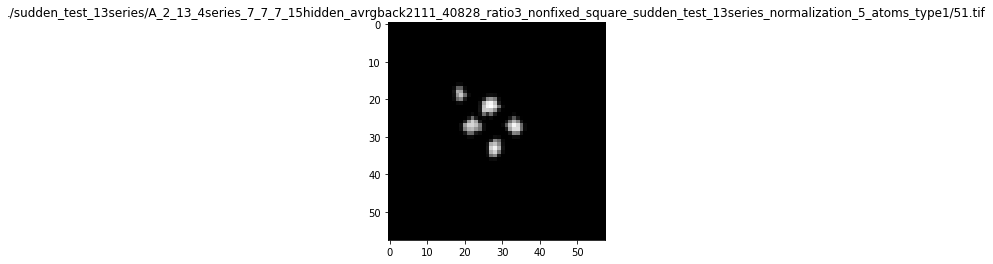

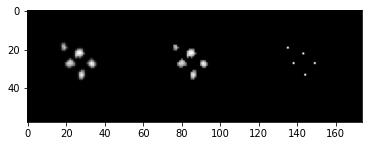

  1%|          | 1/155 [00:00<00:56,  2.73it/s]

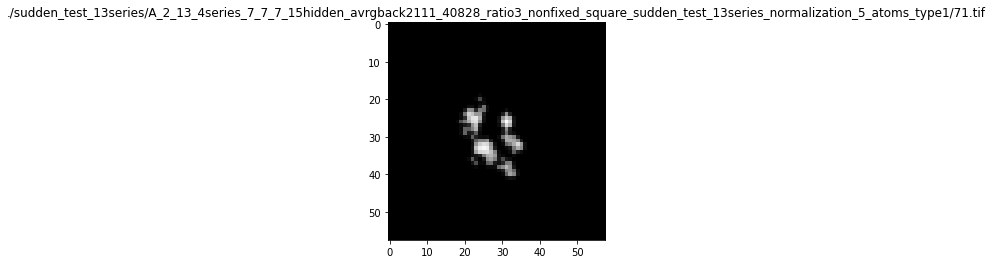

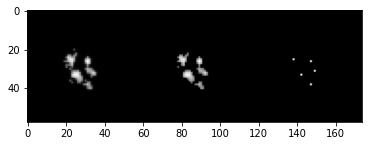

  1%|▏         | 2/155 [00:00<01:02,  2.46it/s]

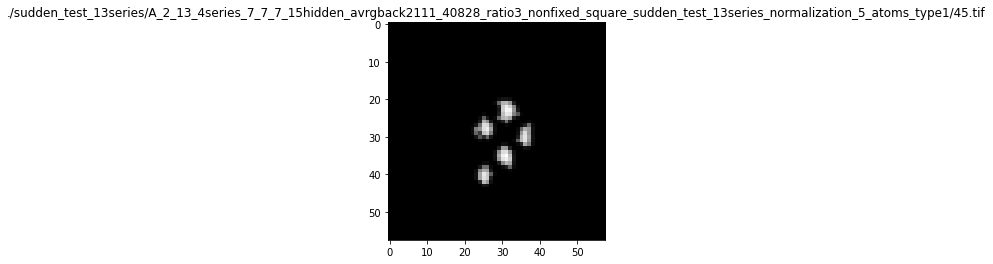

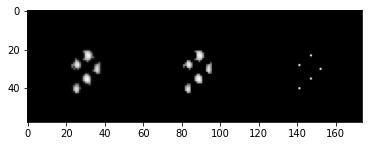

  2%|▏         | 3/155 [00:01<01:03,  2.41it/s]

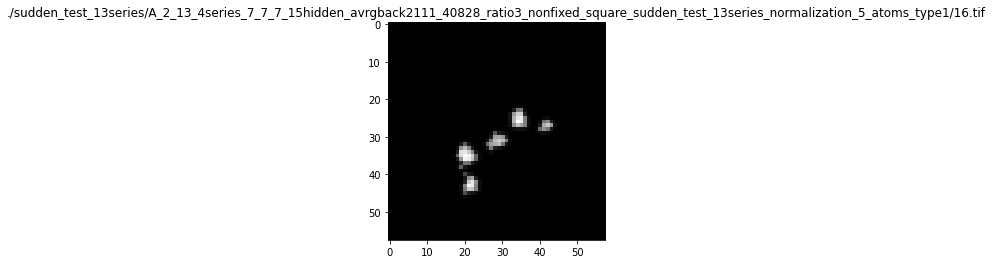

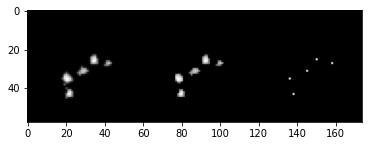

  3%|▎         | 4/155 [00:01<01:01,  2.47it/s]

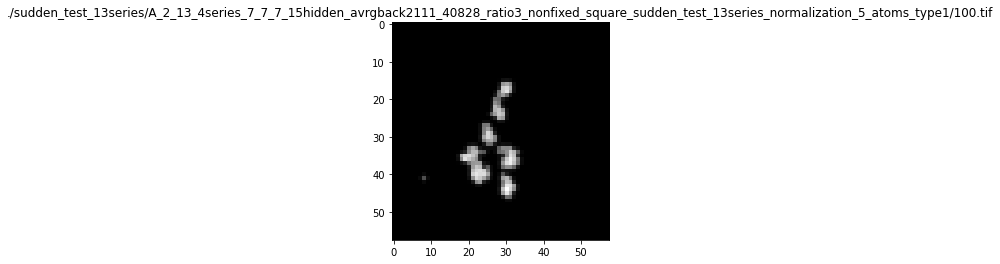

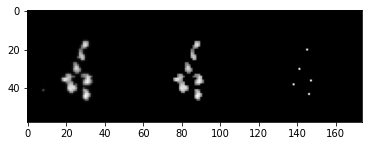

  3%|▎         | 5/155 [00:02<01:07,  2.22it/s]

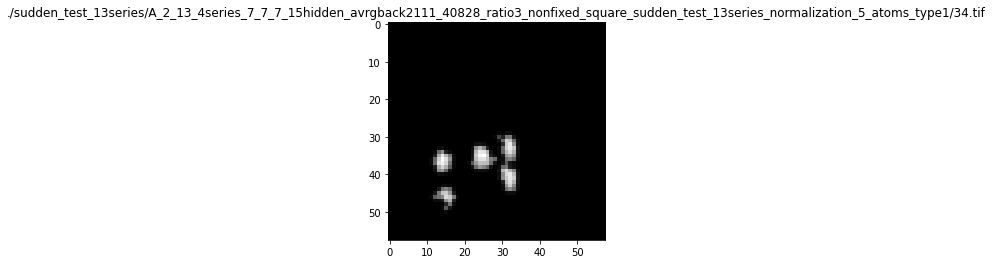

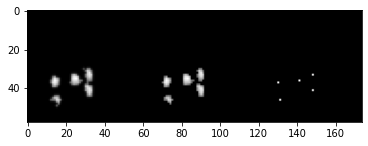

  4%|▍         | 6/155 [00:02<01:07,  2.20it/s]

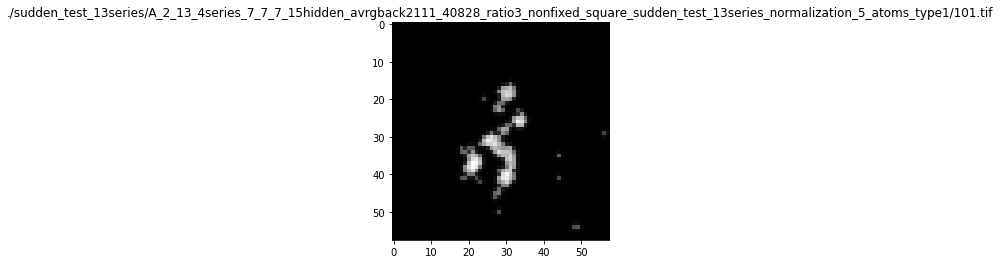

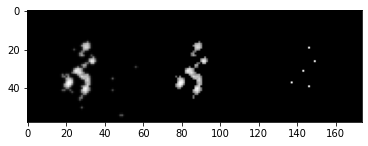

  5%|▍         | 7/155 [00:03<01:12,  2.05it/s]

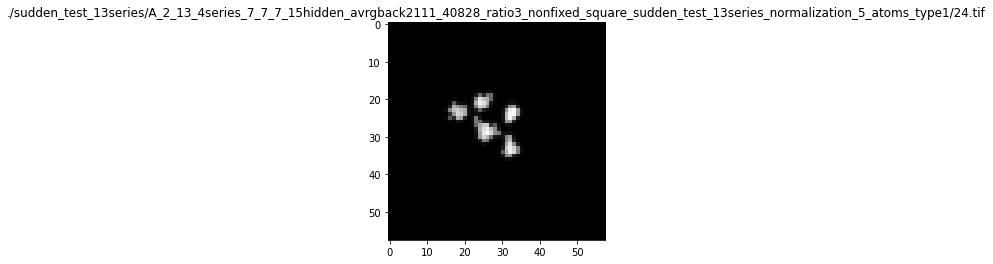

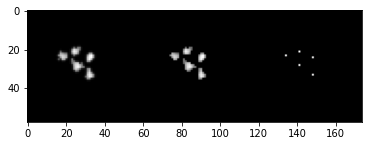

  5%|▌         | 8/155 [00:03<01:08,  2.13it/s]

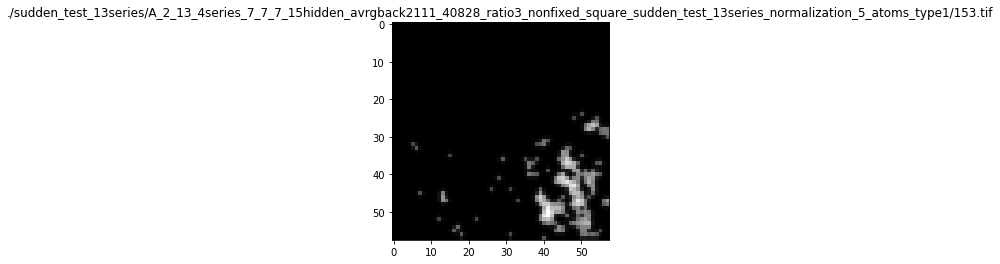

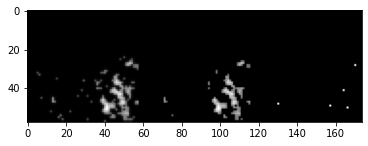

  6%|▌         | 9/155 [00:04<01:19,  1.84it/s]

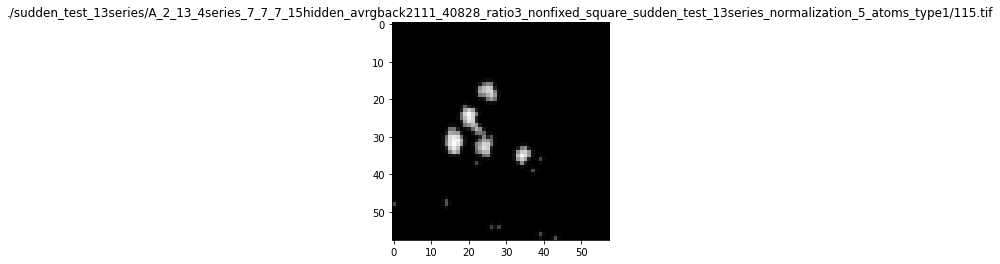

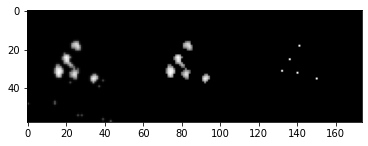

  6%|▋         | 10/155 [00:04<01:16,  1.90it/s]

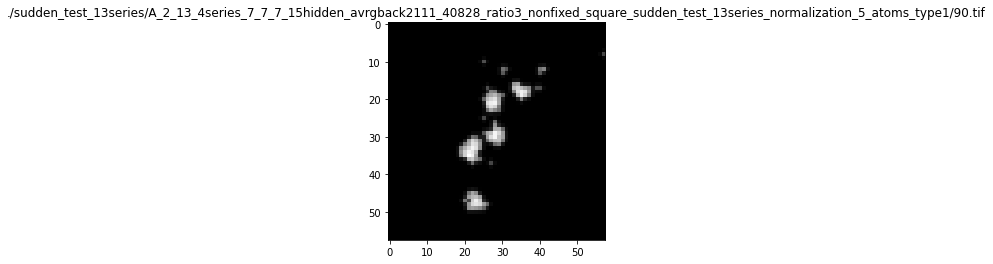

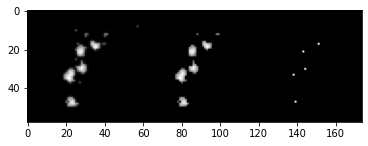

  7%|▋         | 11/155 [00:05<01:13,  1.96it/s]

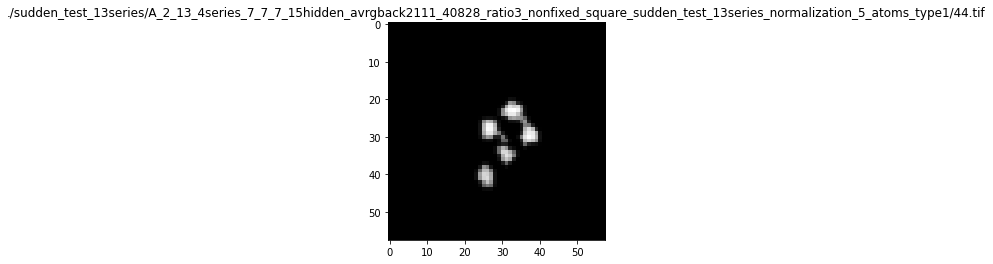

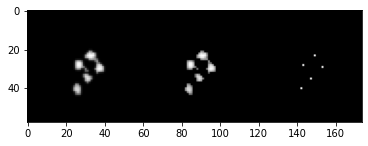

  8%|▊         | 12/155 [00:05<01:10,  2.03it/s]

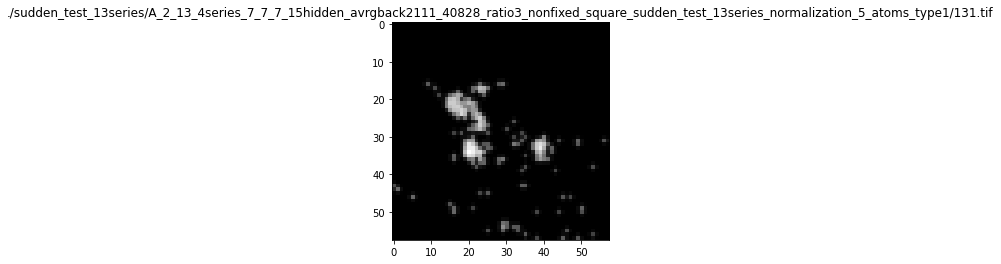

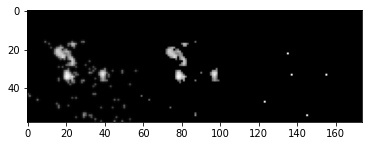

  8%|▊         | 13/155 [00:06<01:13,  1.94it/s]

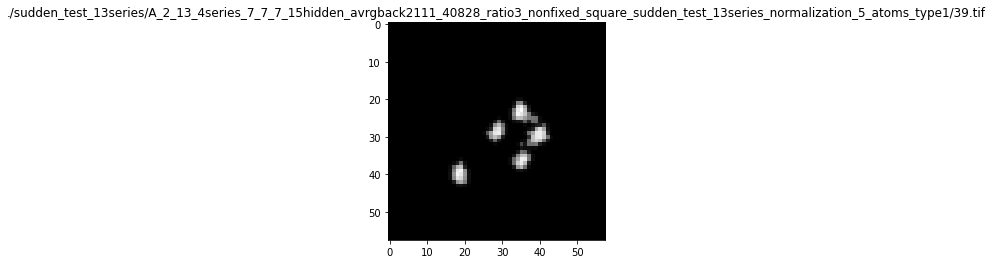

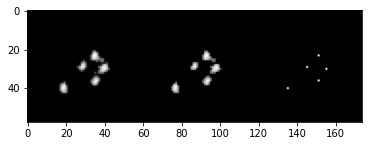

  9%|▉         | 14/155 [00:06<01:10,  2.01it/s]

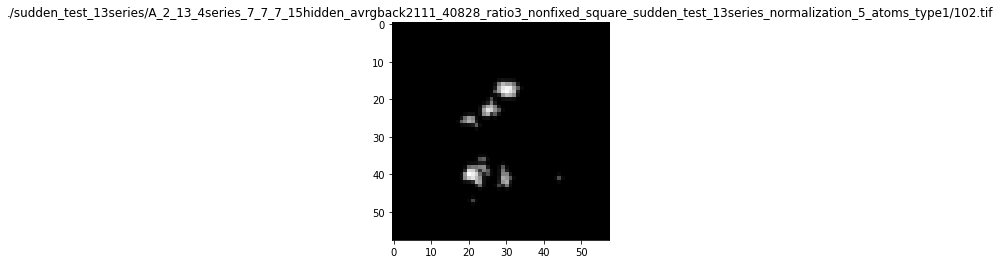

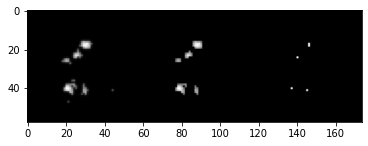

 10%|▉         | 15/155 [00:07<01:05,  2.15it/s]

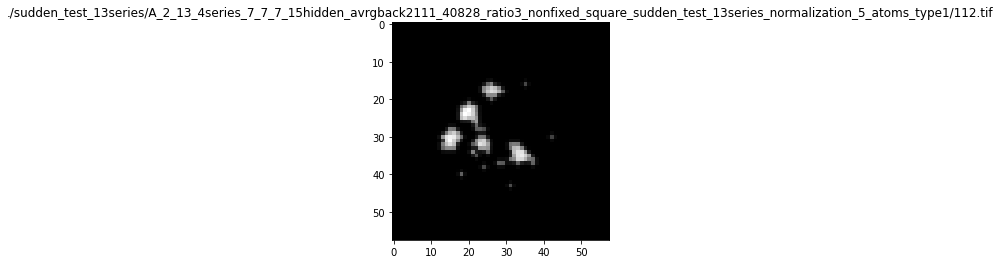

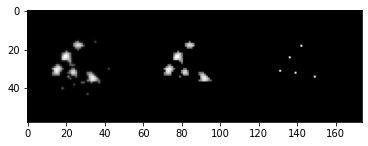

 10%|█         | 16/155 [00:07<01:04,  2.15it/s]

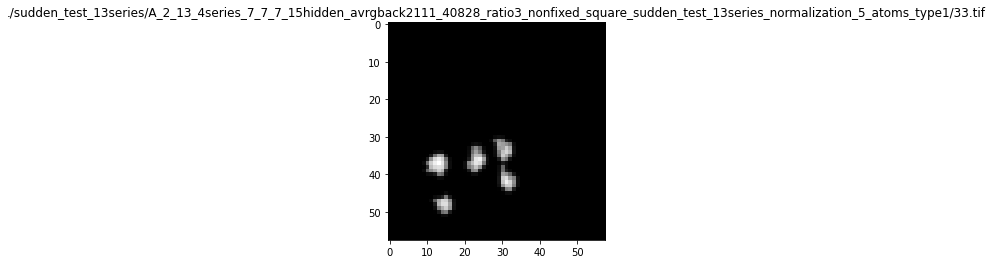

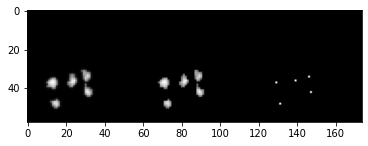

 11%|█         | 17/155 [00:08<01:03,  2.18it/s]

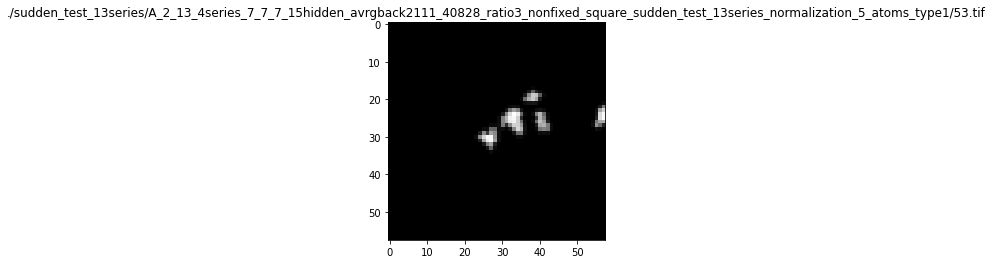

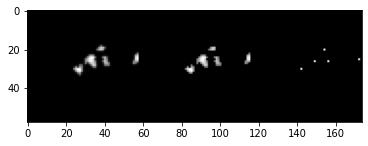

 12%|█▏        | 18/155 [00:08<01:00,  2.28it/s]

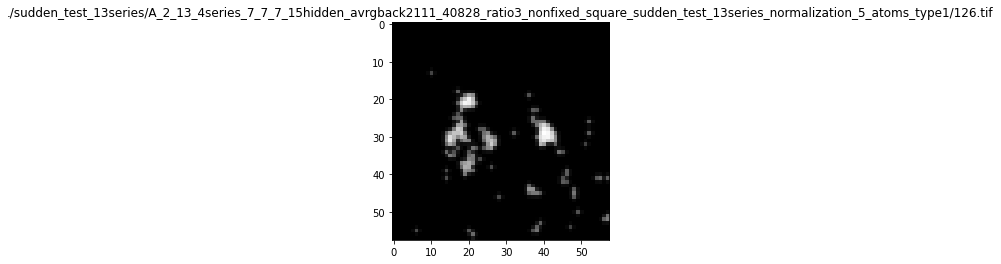

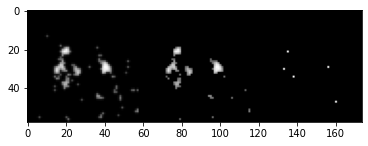

 12%|█▏        | 19/155 [00:08<01:04,  2.11it/s]

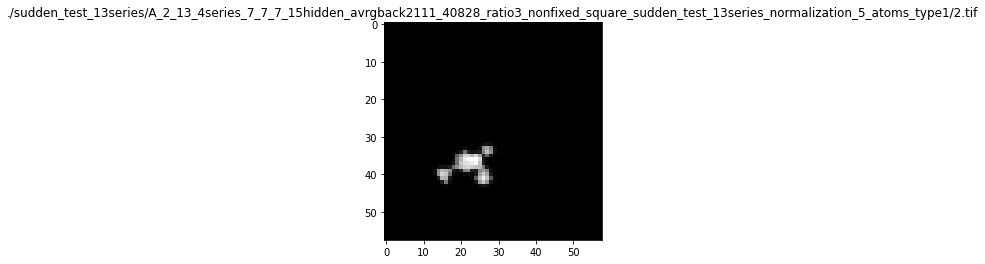

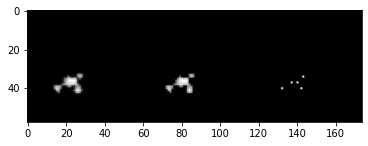

 13%|█▎        | 20/155 [00:09<01:01,  2.19it/s]

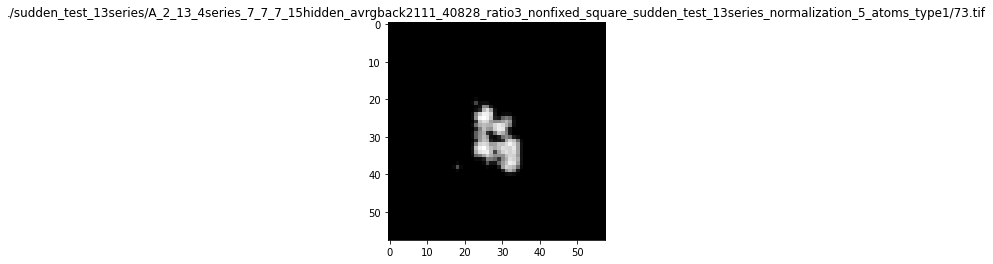

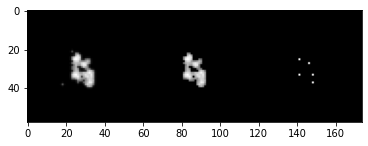

 14%|█▎        | 21/155 [00:09<01:05,  2.04it/s]

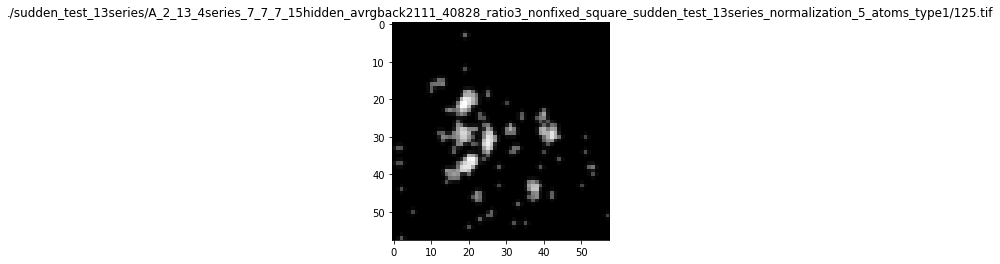

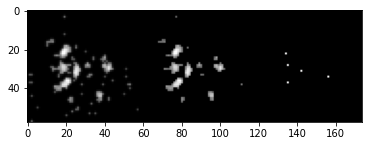

 14%|█▍        | 22/155 [00:10<01:11,  1.86it/s]

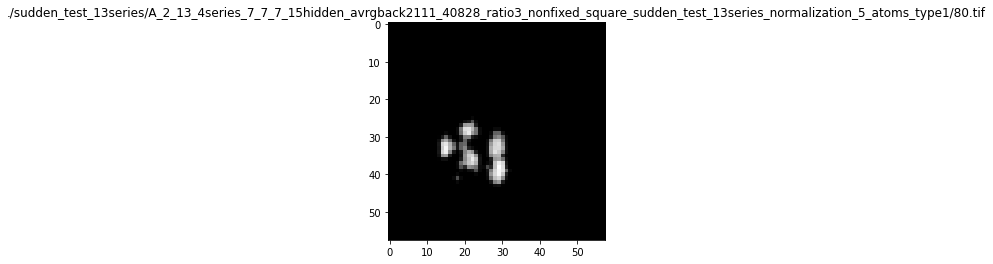

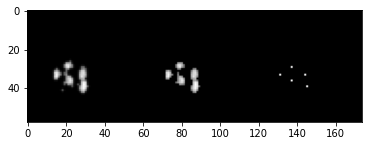

 15%|█▍        | 23/155 [00:11<01:07,  1.96it/s]

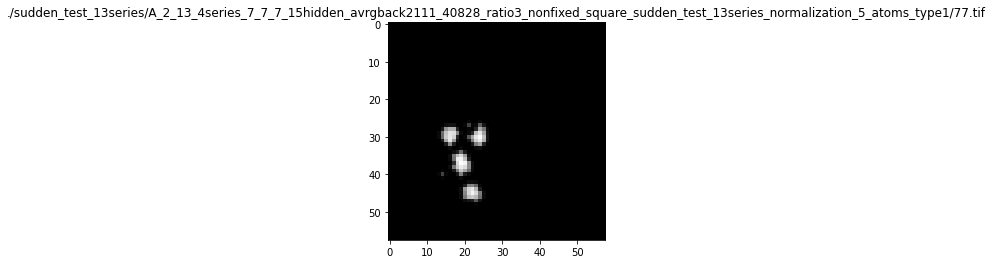

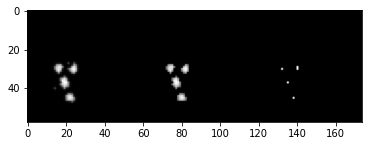

 15%|█▌        | 24/155 [00:11<01:03,  2.06it/s]

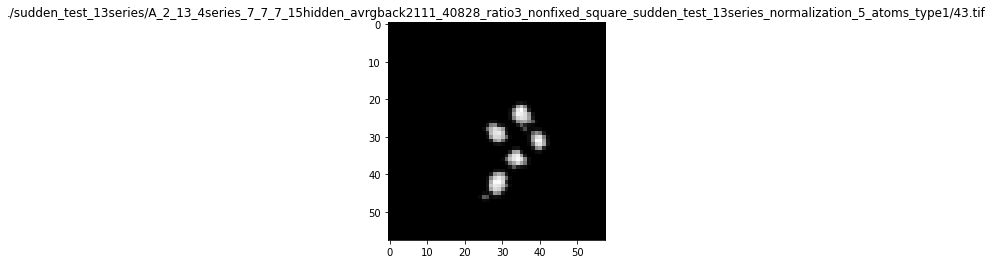

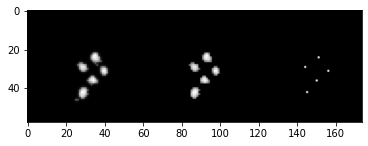

 16%|█▌        | 25/155 [00:11<01:01,  2.10it/s]

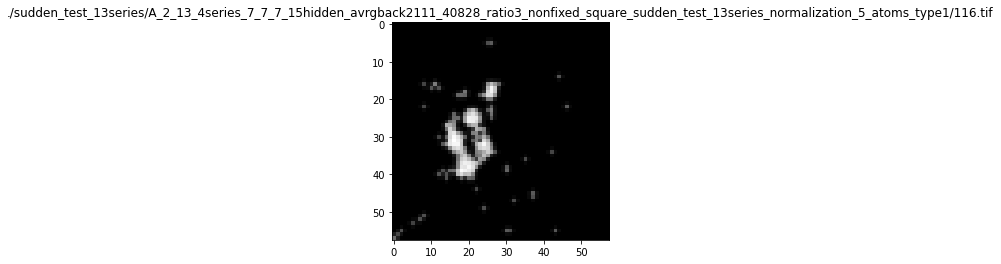

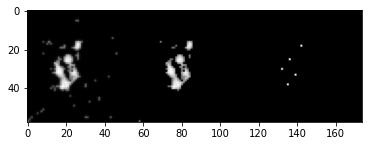

 17%|█▋        | 26/155 [00:12<01:07,  1.90it/s]

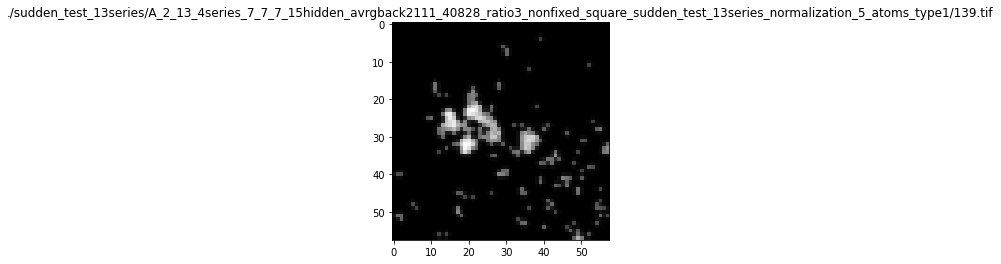

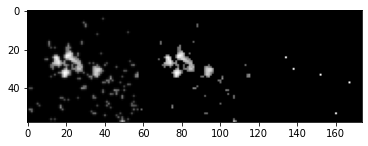

 17%|█▋        | 27/155 [00:13<01:11,  1.78it/s]

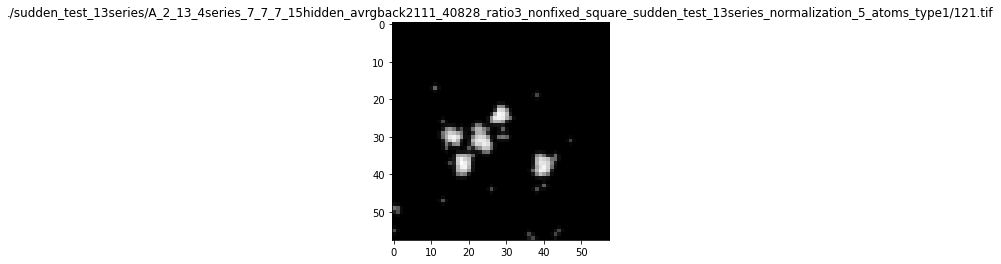

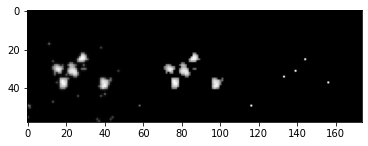

 18%|█▊        | 28/155 [00:13<01:12,  1.75it/s]

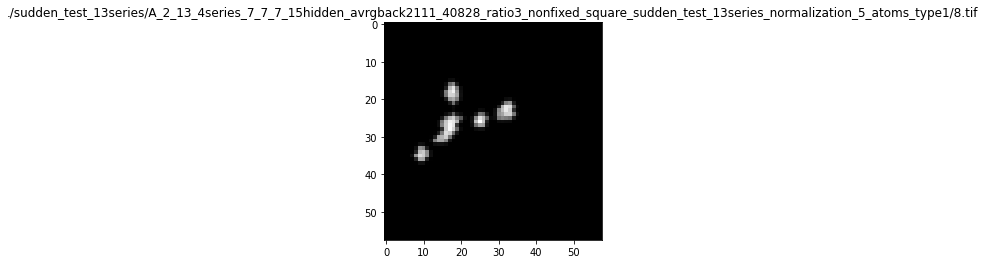

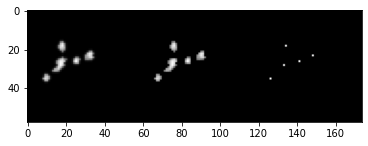

 19%|█▊        | 29/155 [00:14<01:05,  1.91it/s]

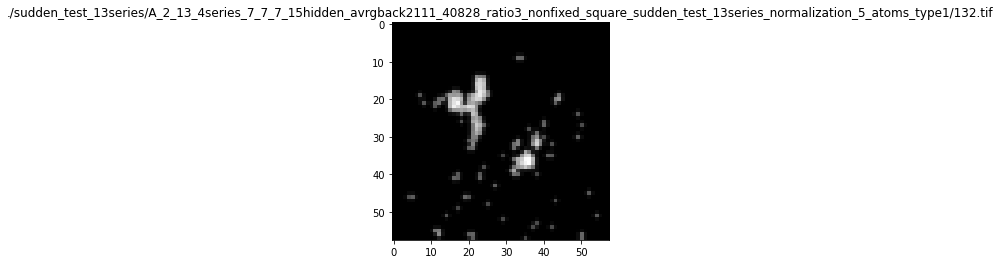

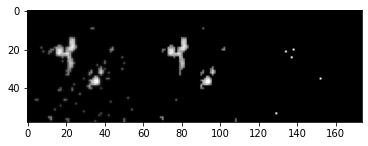

 19%|█▉        | 30/155 [00:14<01:08,  1.82it/s]

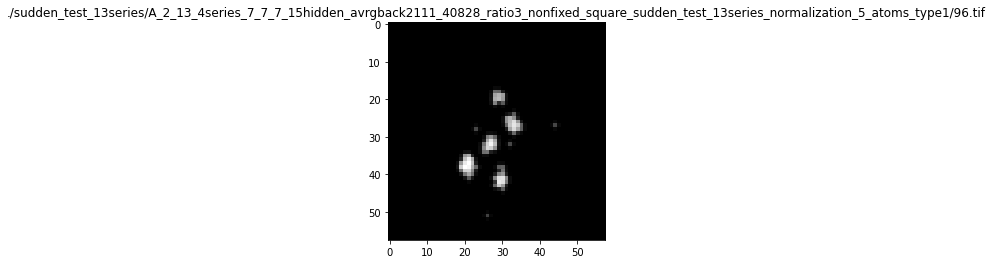

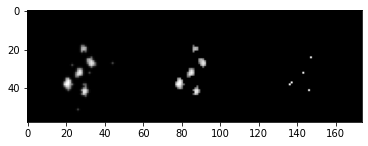

 20%|██        | 31/155 [00:15<01:02,  1.98it/s]

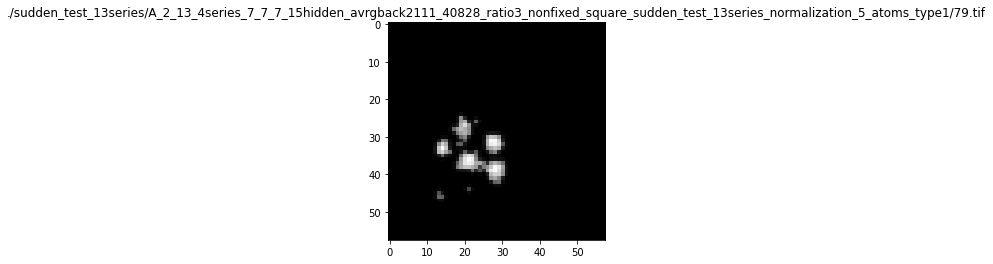

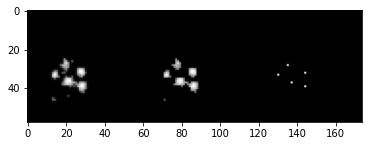

 21%|██        | 32/155 [00:15<00:59,  2.08it/s]

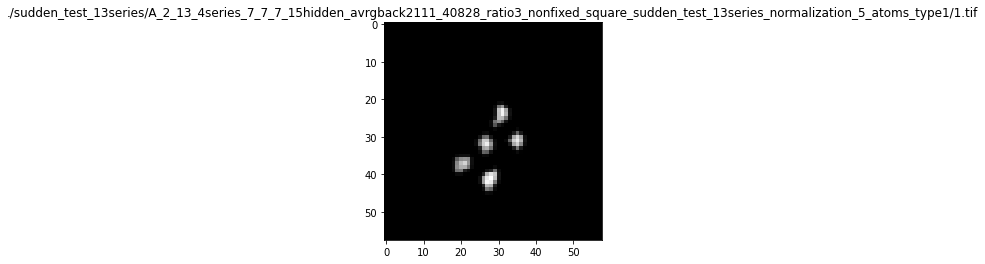

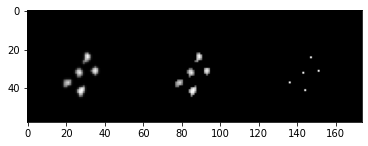

 21%|██▏       | 33/155 [00:16<00:56,  2.17it/s]

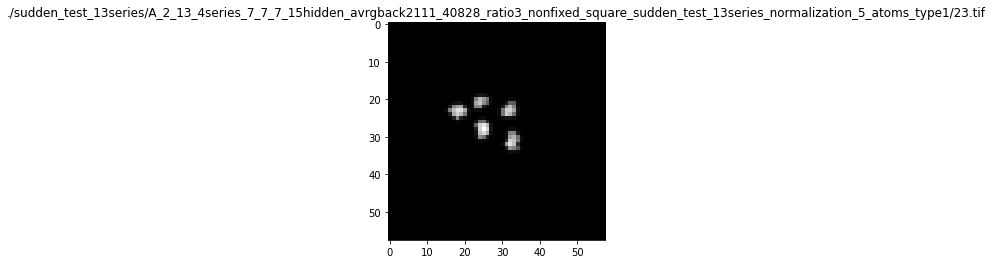

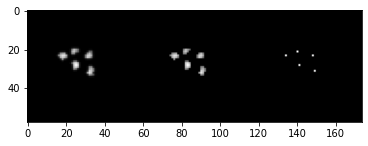

 22%|██▏       | 34/155 [00:16<00:53,  2.27it/s]

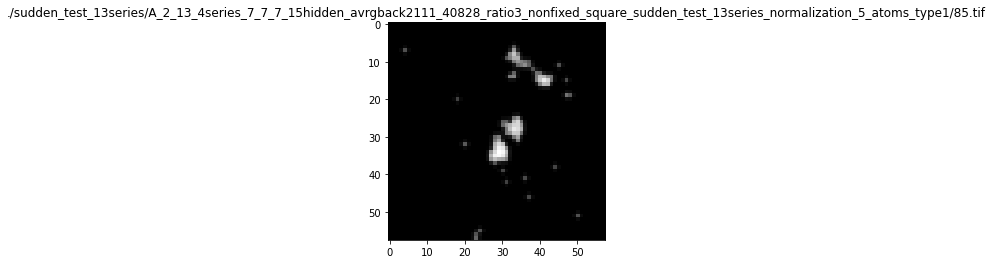

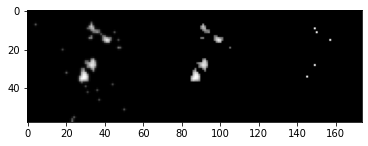

 23%|██▎       | 35/155 [00:16<00:51,  2.32it/s]

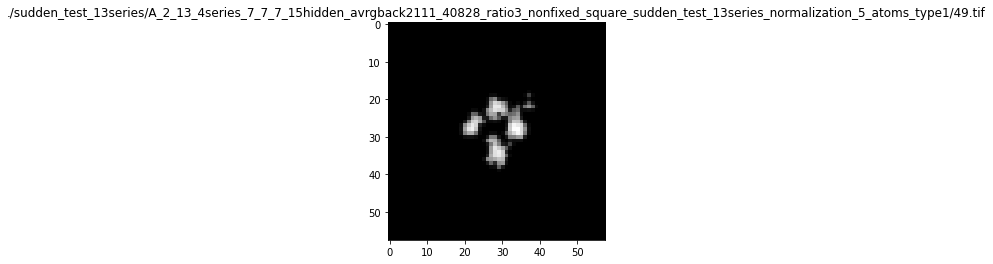

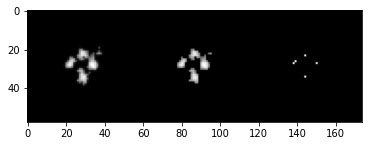

 23%|██▎       | 36/155 [00:17<00:53,  2.23it/s]

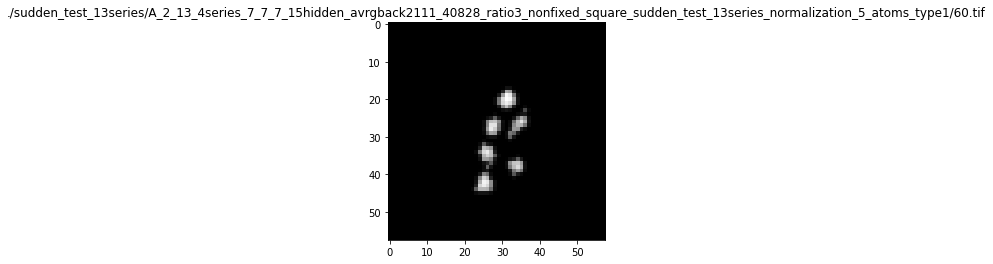

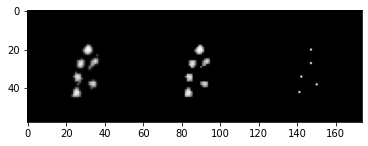

 24%|██▍       | 37/155 [00:17<00:55,  2.13it/s]

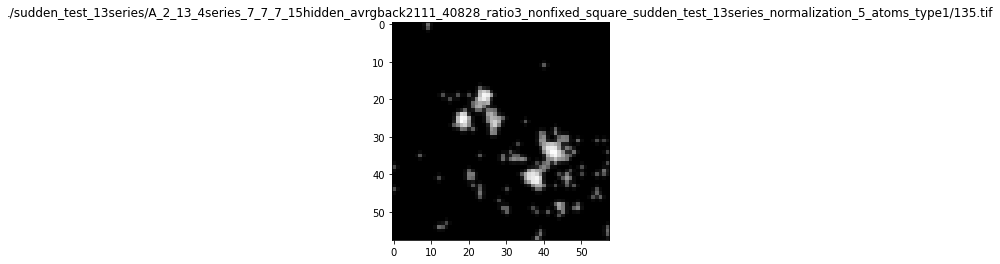

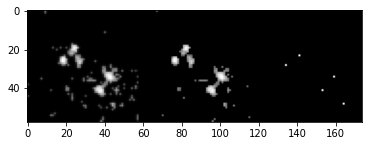

 25%|██▍       | 38/155 [00:18<00:59,  1.97it/s]

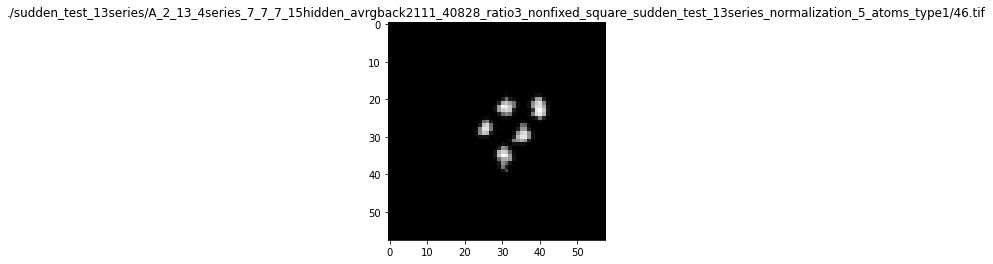

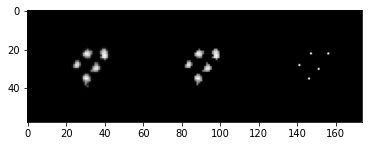

 25%|██▌       | 39/155 [00:18<00:55,  2.09it/s]

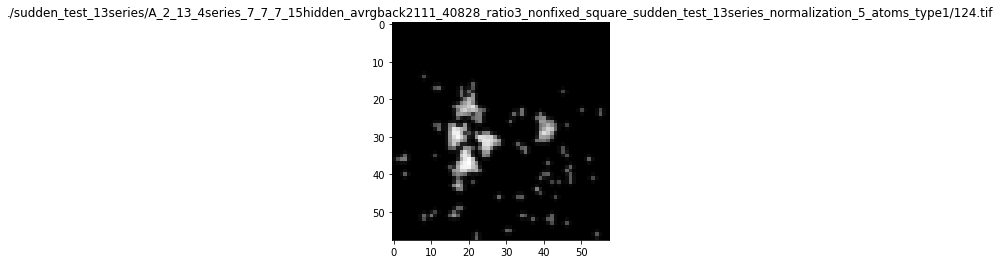

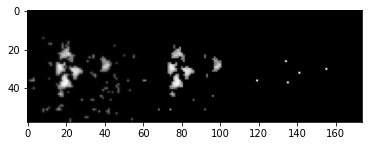

 26%|██▌       | 40/155 [00:19<01:07,  1.71it/s]

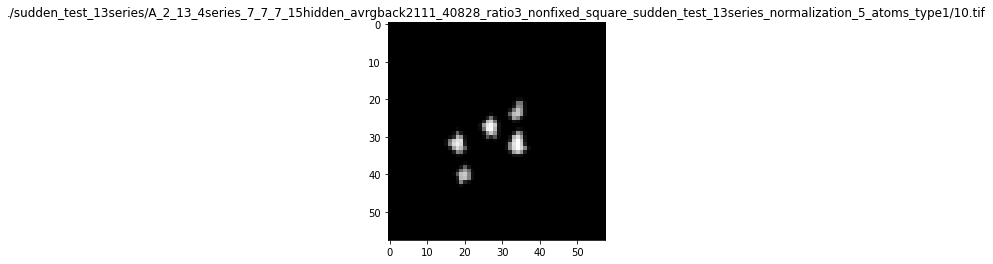

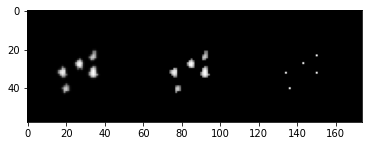

 26%|██▋       | 41/155 [00:20<01:01,  1.85it/s]

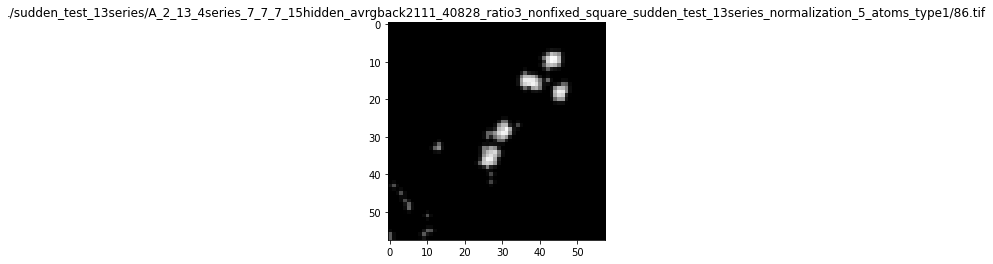

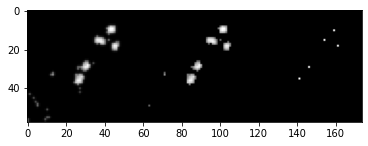

 27%|██▋       | 42/155 [00:20<00:58,  1.93it/s]

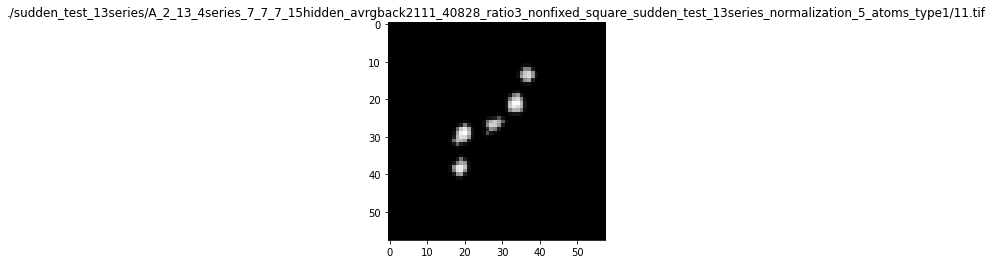

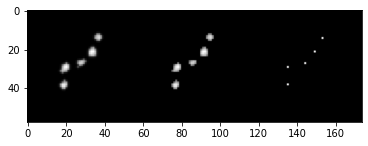

 28%|██▊       | 43/155 [00:21<00:53,  2.09it/s]

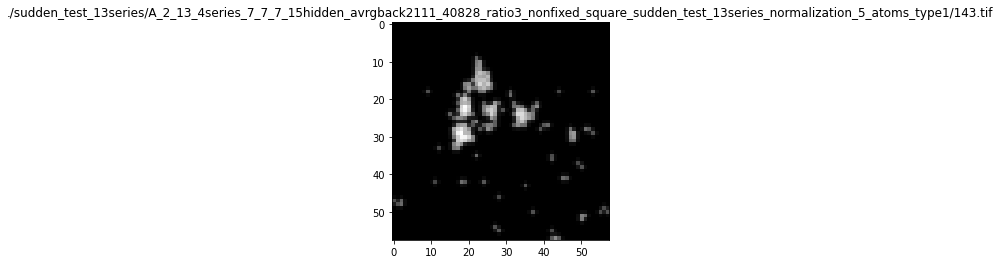

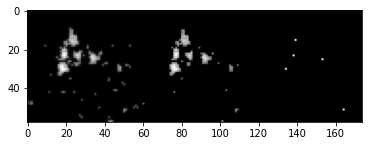

 28%|██▊       | 44/155 [00:21<00:57,  1.94it/s]

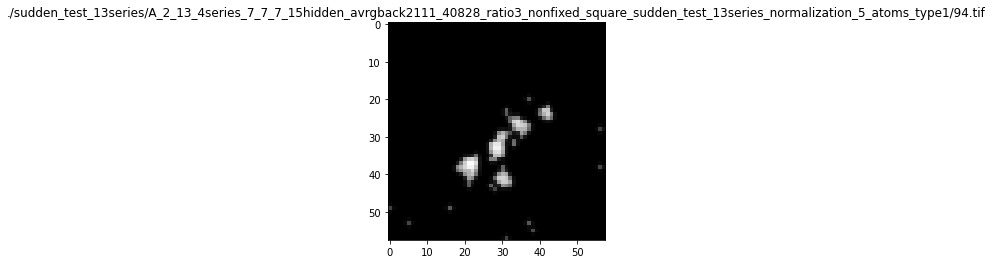

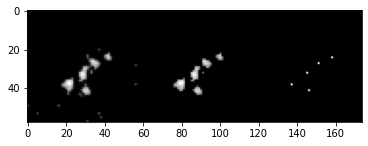

 29%|██▉       | 45/155 [00:22<00:54,  2.02it/s]

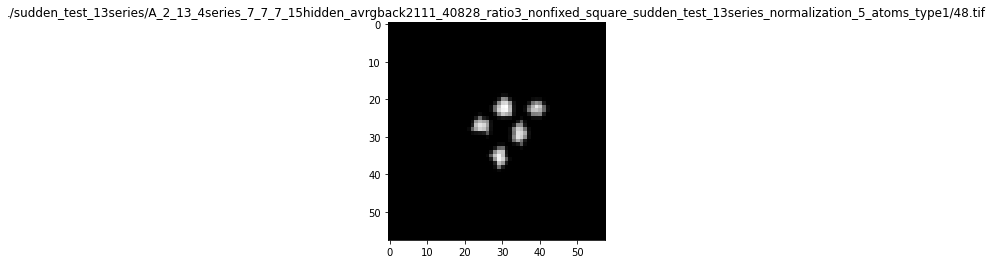

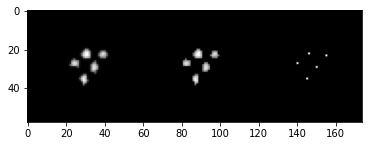

 30%|██▉       | 46/155 [00:22<00:53,  2.06it/s]

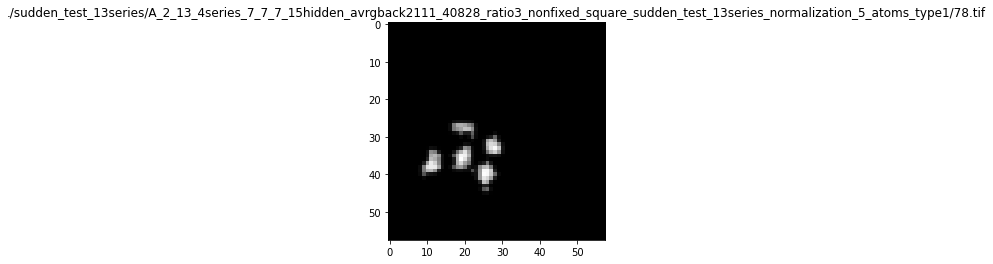

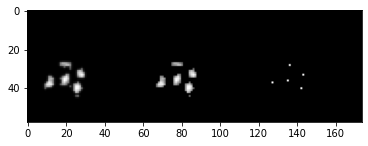

 30%|███       | 47/155 [00:22<00:51,  2.11it/s]

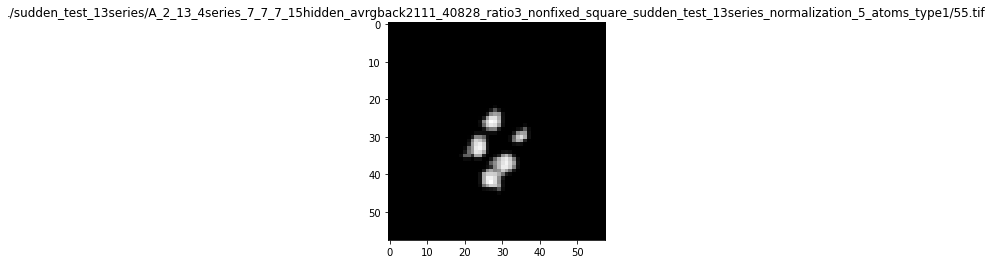

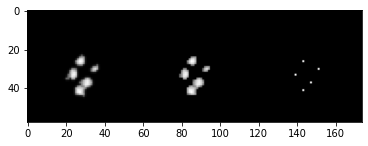

 31%|███       | 48/155 [00:23<00:50,  2.13it/s]

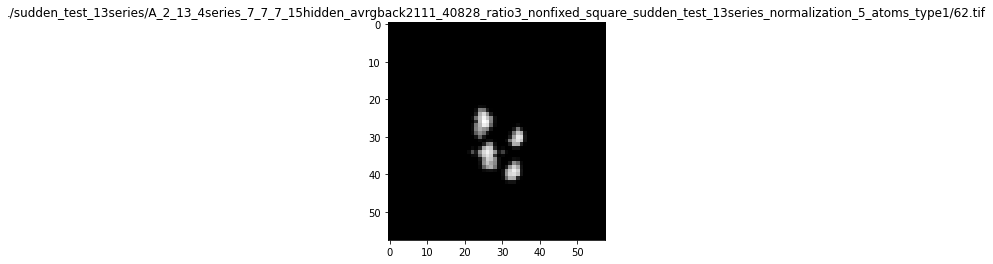

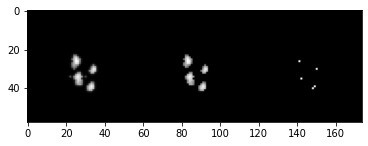

 32%|███▏      | 49/155 [00:23<00:47,  2.22it/s]

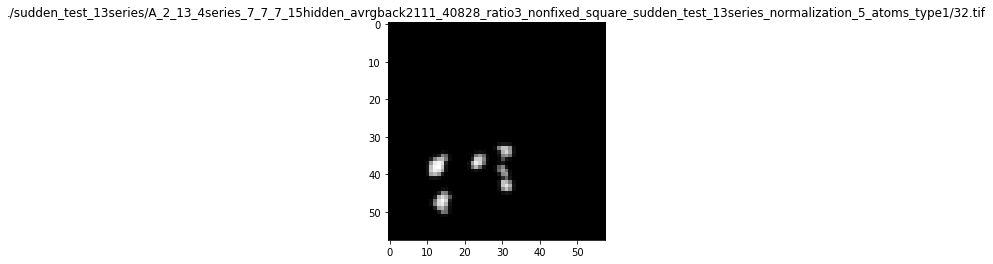

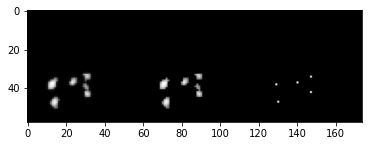

 32%|███▏      | 50/155 [00:24<00:49,  2.13it/s]

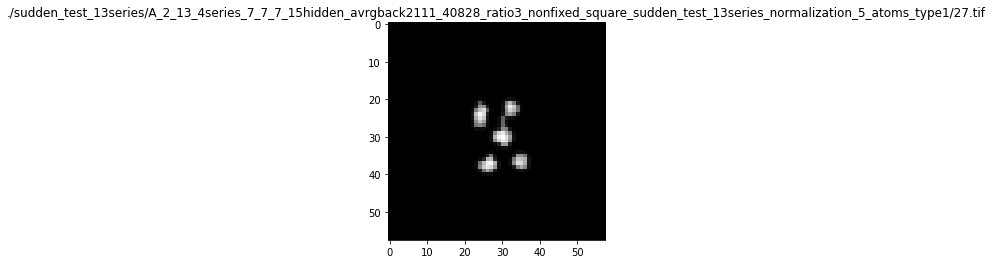

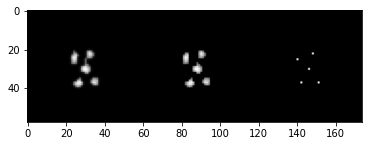

 33%|███▎      | 51/155 [00:24<00:47,  2.20it/s]

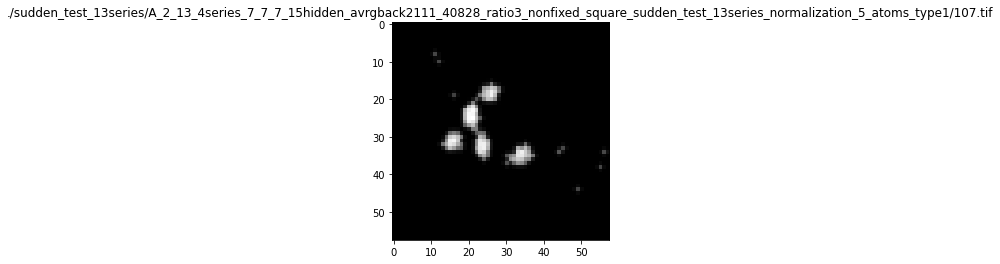

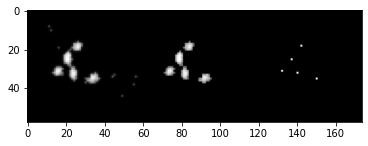

 34%|███▎      | 52/155 [00:25<00:48,  2.14it/s]

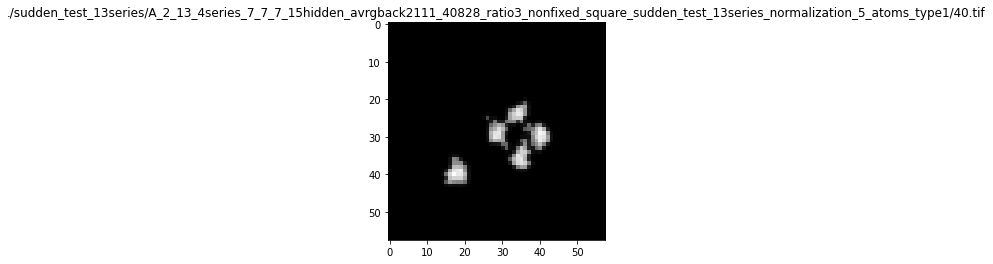

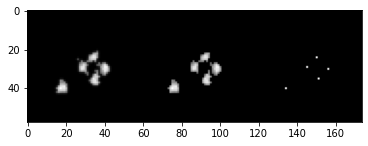

 34%|███▍      | 53/155 [00:25<00:49,  2.07it/s]

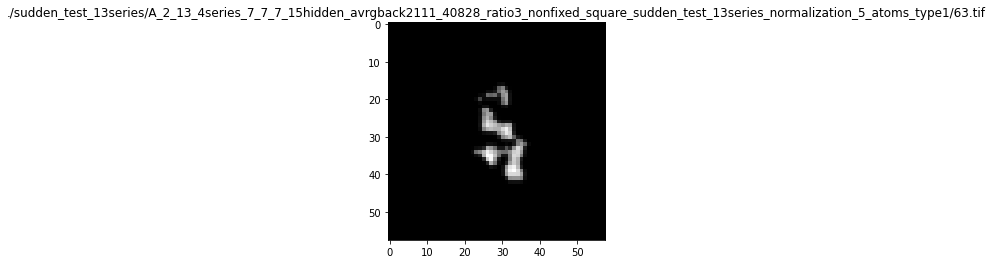

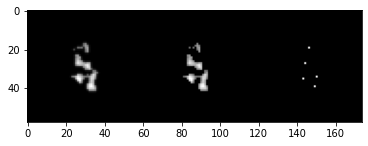

 35%|███▍      | 54/155 [00:26<00:48,  2.07it/s]

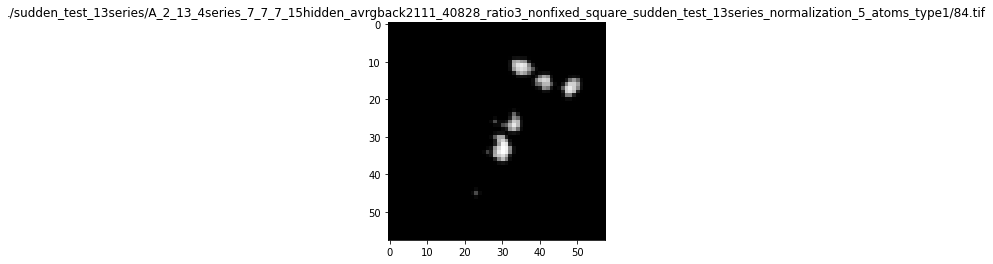

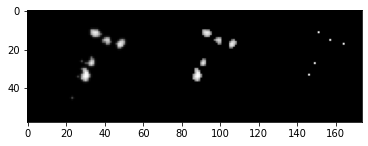

 35%|███▌      | 55/155 [00:26<00:47,  2.11it/s]

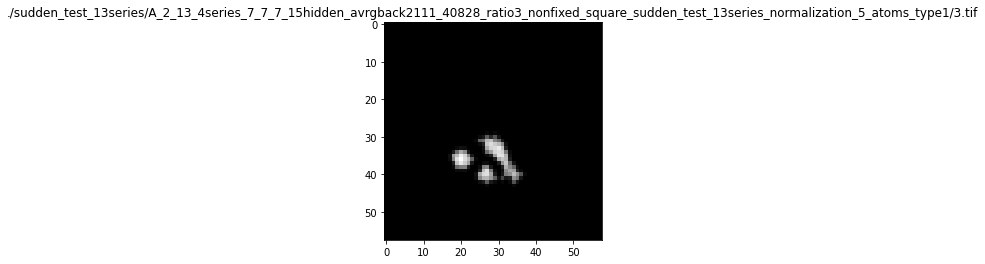

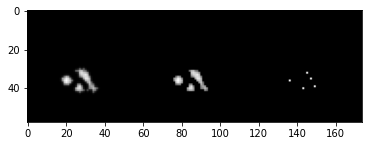

 36%|███▌      | 56/155 [00:27<00:44,  2.23it/s]

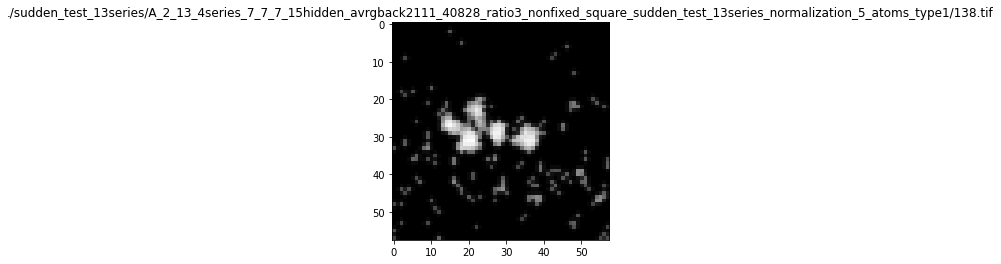

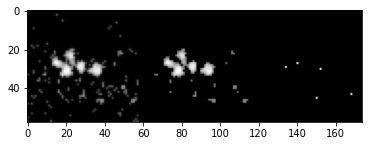

 37%|███▋      | 57/155 [00:27<00:52,  1.86it/s]

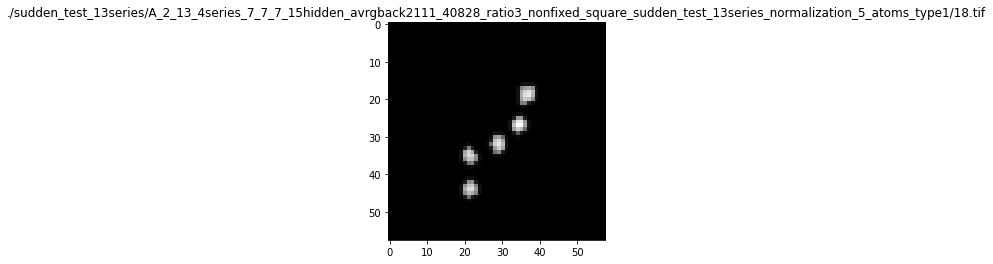

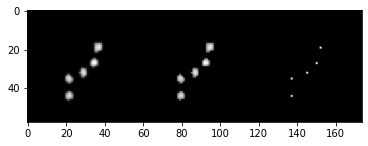

 37%|███▋      | 58/155 [00:28<00:53,  1.81it/s]

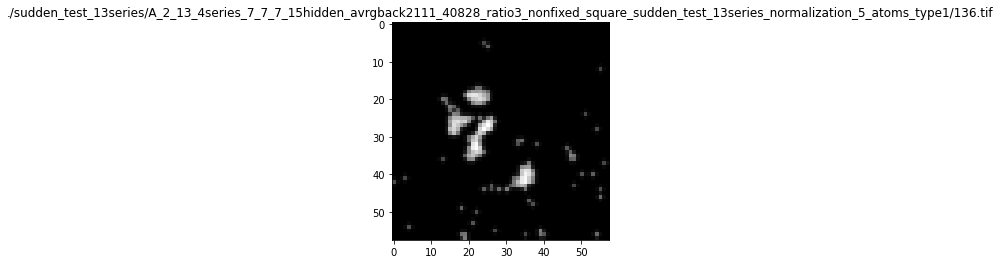

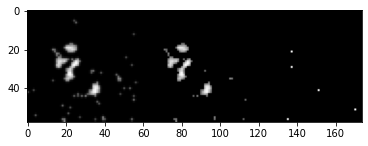

 38%|███▊      | 59/155 [00:29<00:54,  1.77it/s]

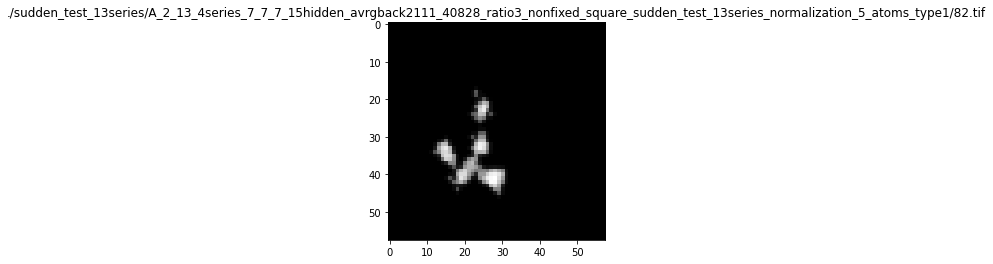

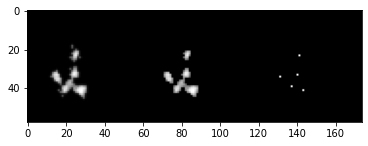

 39%|███▊      | 60/155 [00:29<00:51,  1.84it/s]

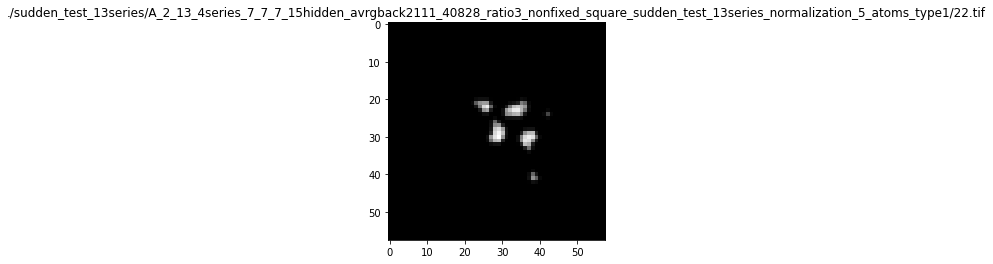

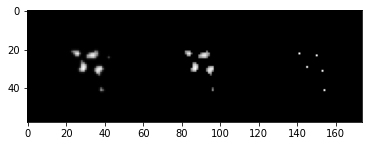

 39%|███▉      | 61/155 [00:29<00:46,  2.03it/s]

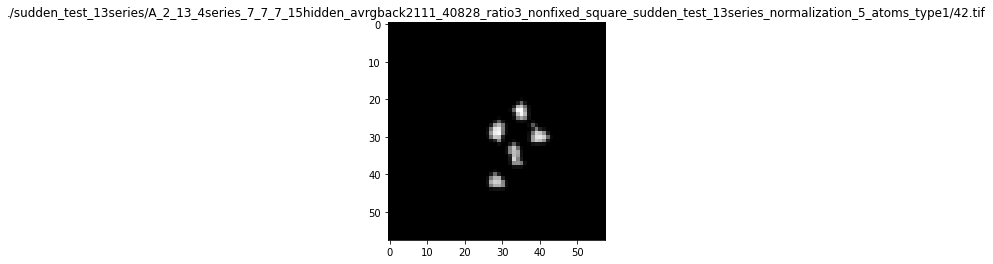

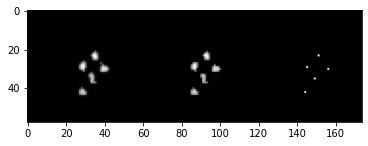

 40%|████      | 62/155 [00:30<00:48,  1.94it/s]

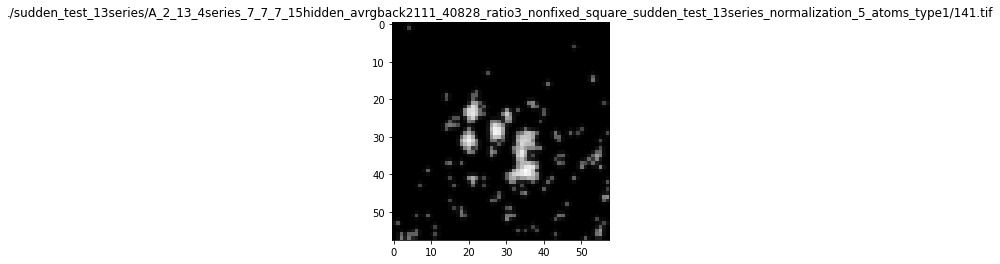

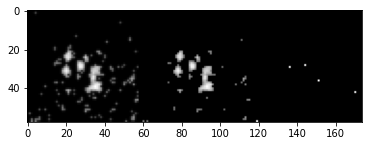

 41%|████      | 63/155 [00:31<00:52,  1.74it/s]

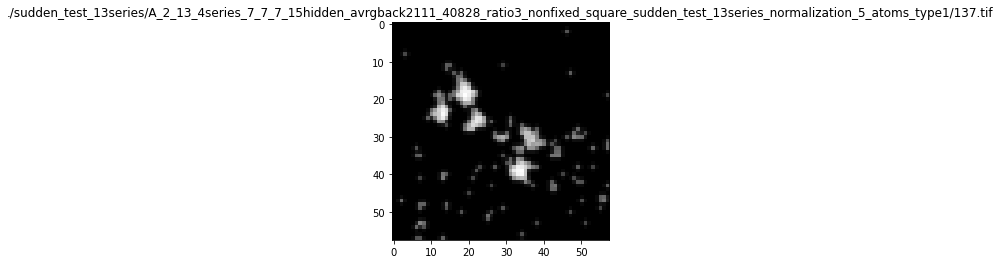

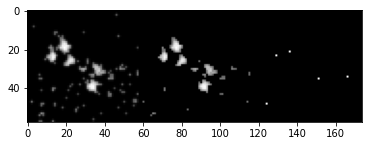

 41%|████▏     | 64/155 [00:31<00:55,  1.64it/s]

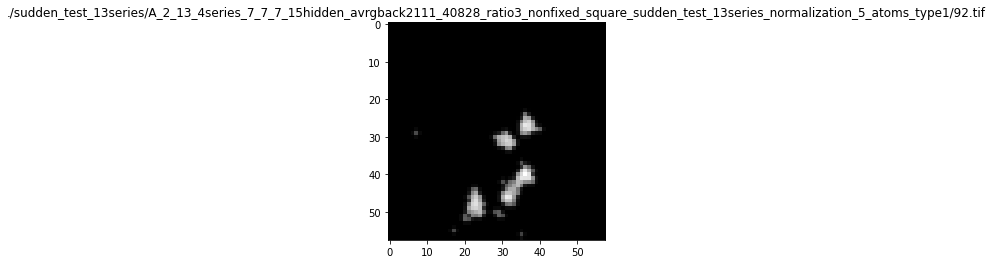

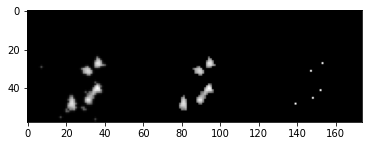

 42%|████▏     | 65/155 [00:32<00:57,  1.58it/s]

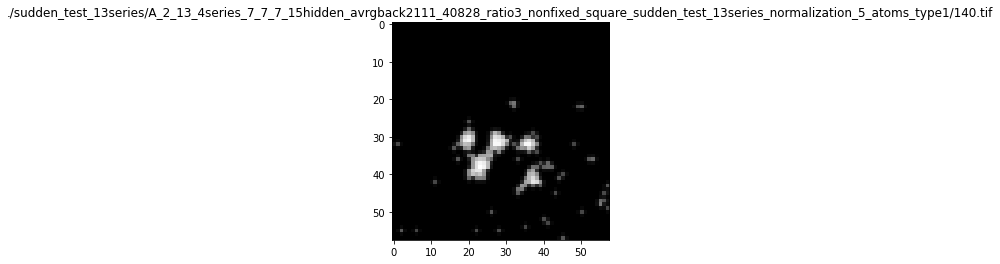

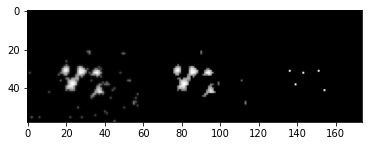

 43%|████▎     | 66/155 [00:33<00:53,  1.66it/s]

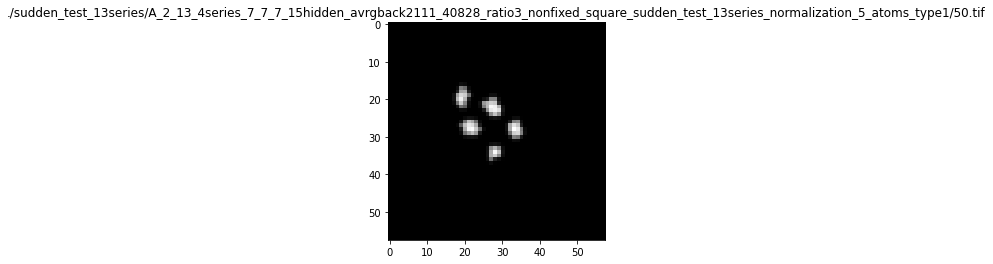

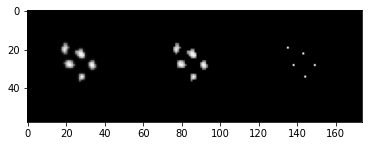

 43%|████▎     | 67/155 [00:33<00:47,  1.86it/s]

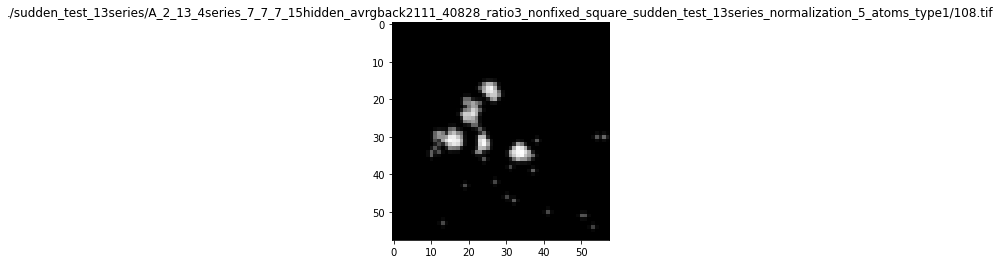

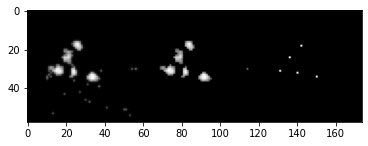

 44%|████▍     | 68/155 [00:34<00:47,  1.85it/s]

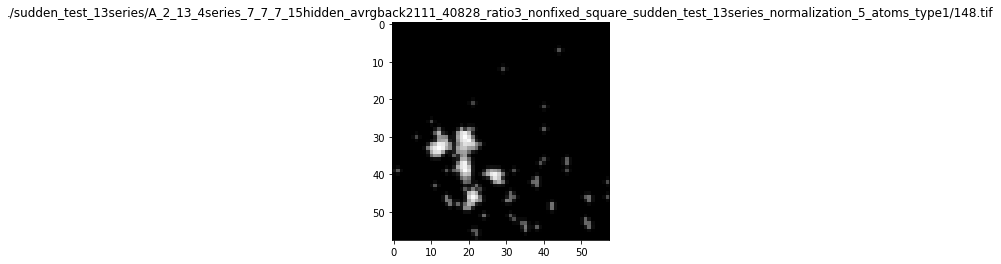

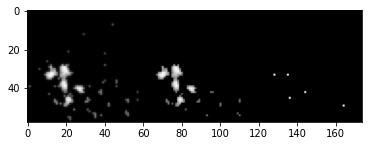

 45%|████▍     | 69/155 [00:34<00:48,  1.77it/s]

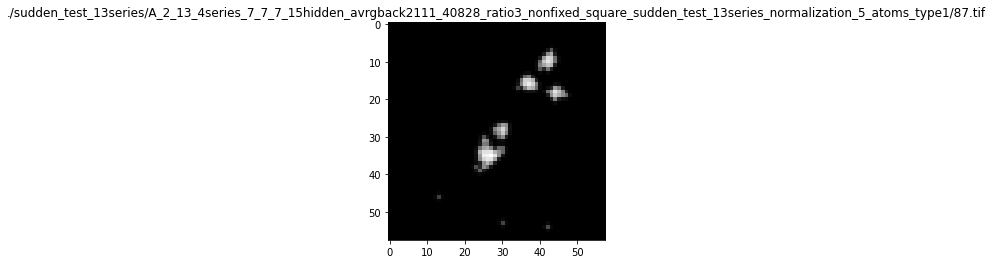

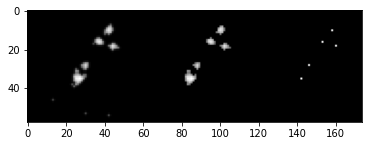

 45%|████▌     | 70/155 [00:35<00:44,  1.92it/s]

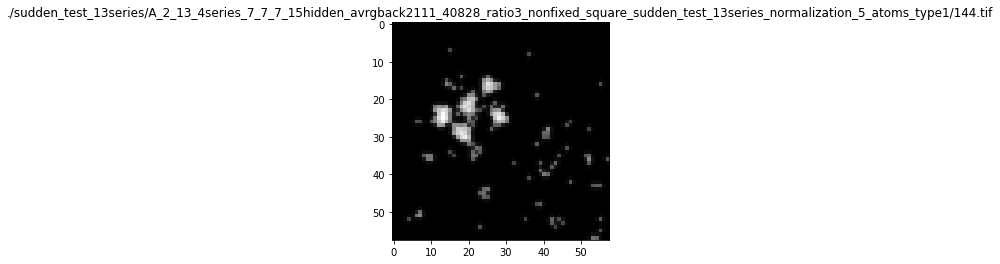

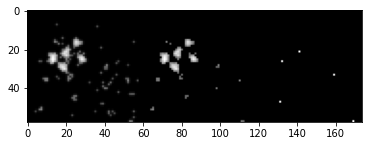

 46%|████▌     | 71/155 [00:35<00:45,  1.83it/s]

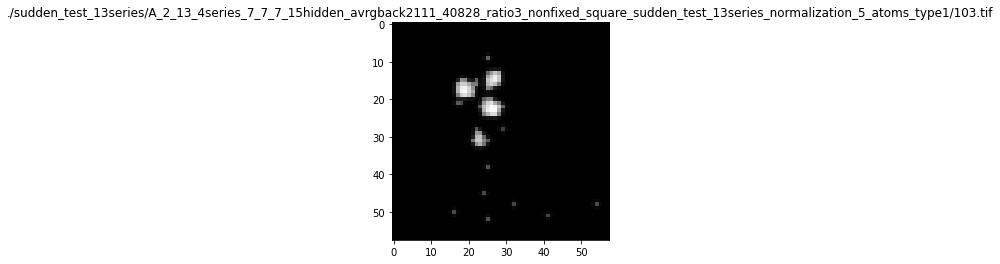

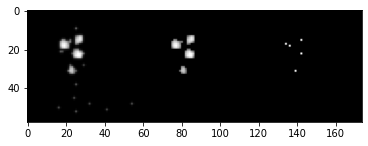

 46%|████▋     | 72/155 [00:36<00:42,  1.95it/s]

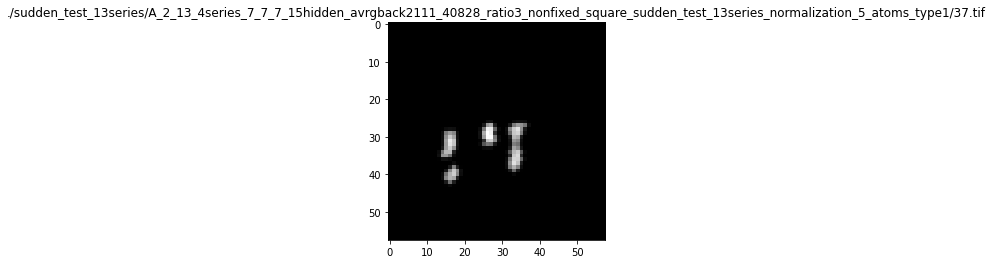

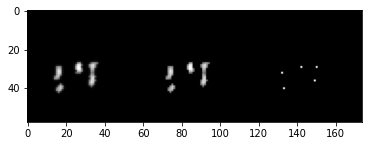

 47%|████▋     | 73/155 [00:36<00:40,  2.02it/s]

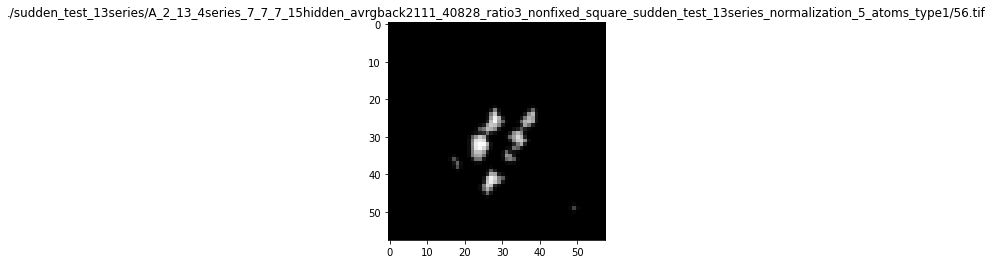

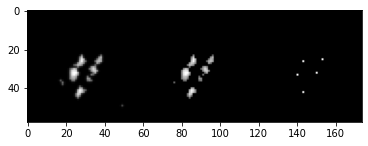

 48%|████▊     | 74/155 [00:37<00:42,  1.90it/s]

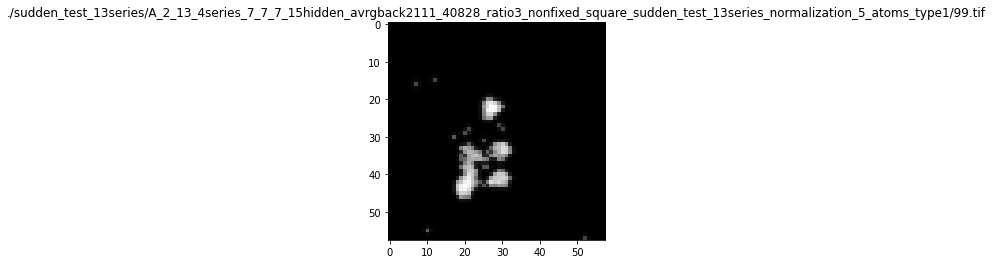

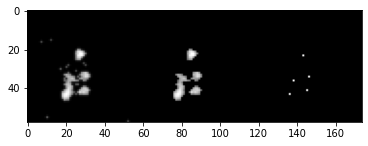

 48%|████▊     | 75/155 [00:37<00:43,  1.86it/s]

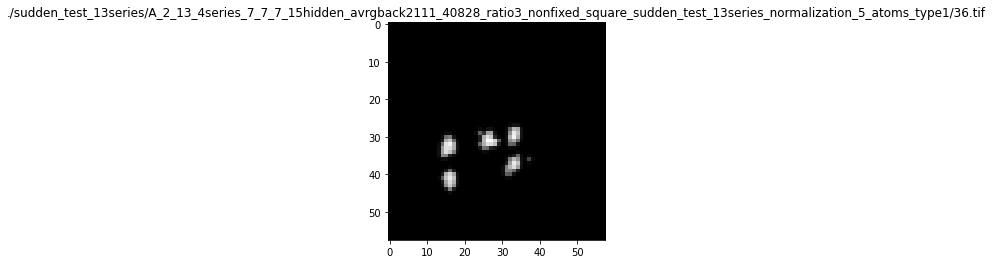

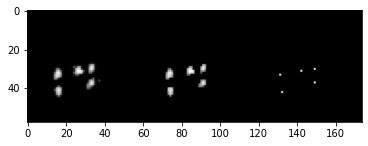

 49%|████▉     | 76/155 [00:38<00:39,  2.01it/s]

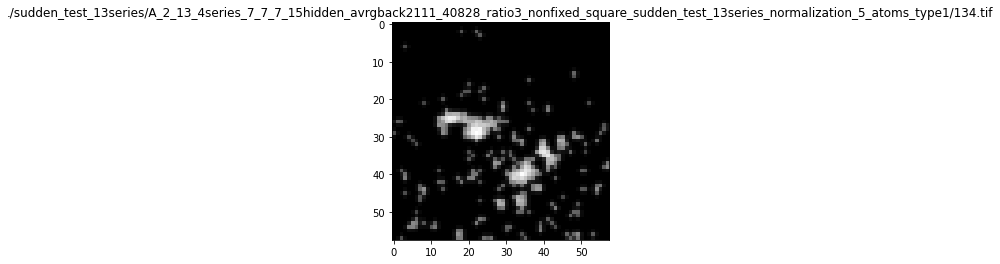

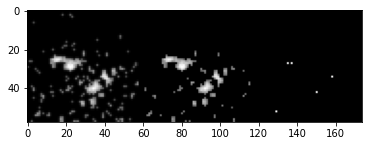

 50%|████▉     | 77/155 [00:38<00:46,  1.67it/s]

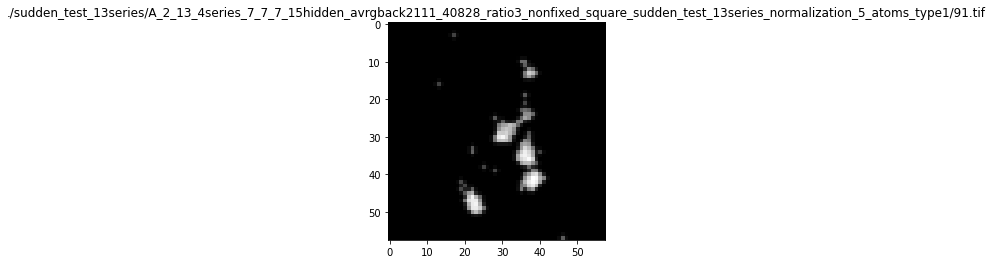

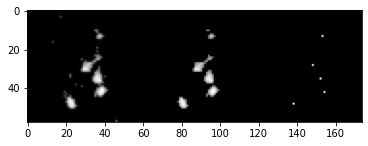

 50%|█████     | 78/155 [00:39<00:44,  1.73it/s]

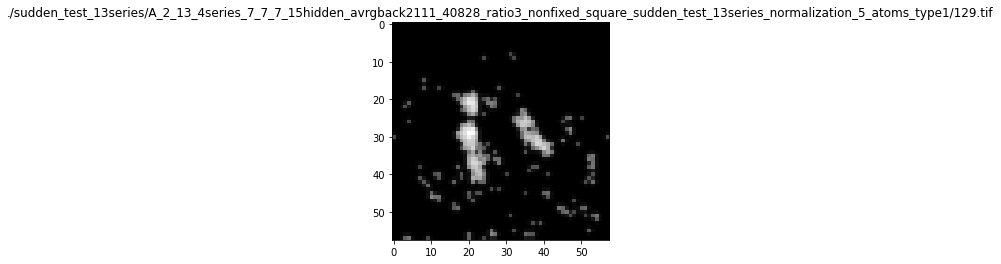

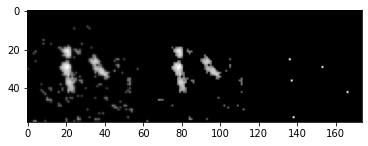

 51%|█████     | 79/155 [00:40<00:47,  1.61it/s]

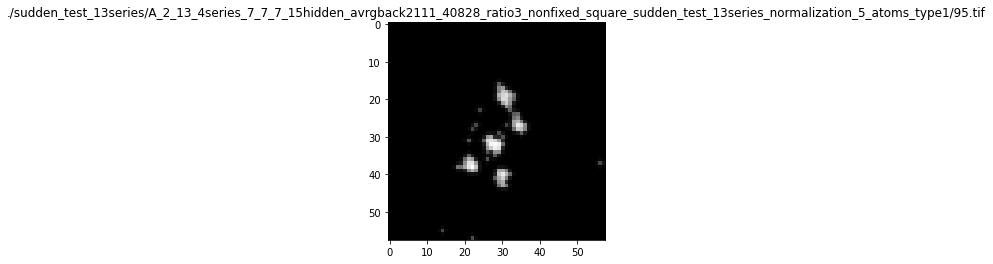

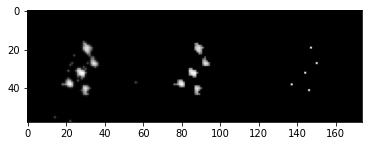

 52%|█████▏    | 80/155 [00:40<00:41,  1.79it/s]

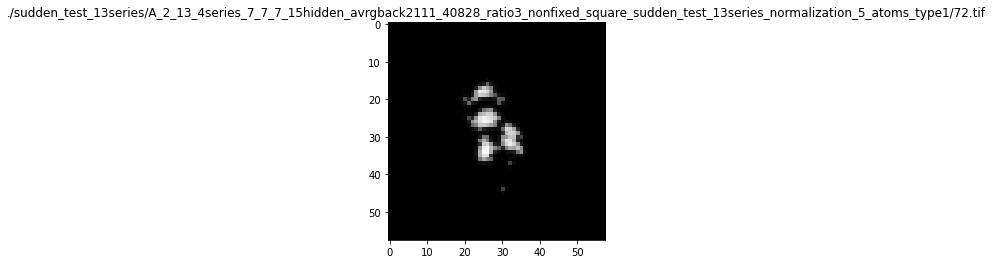

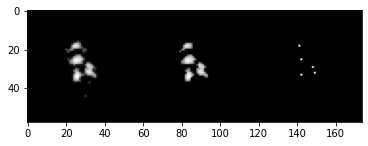

 52%|█████▏    | 81/155 [00:41<00:39,  1.88it/s]

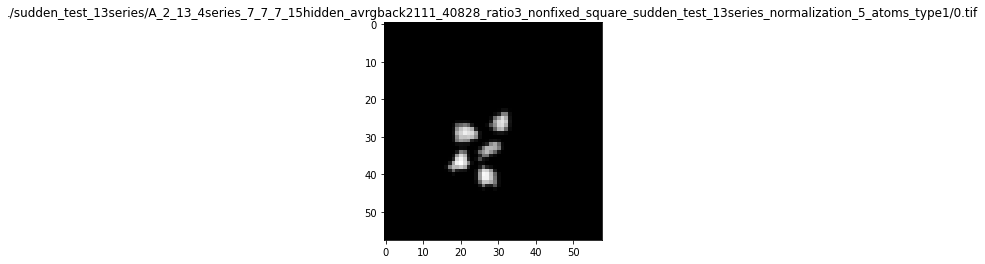

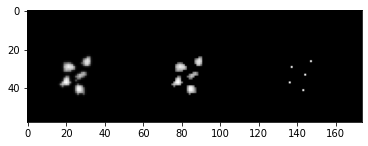

 53%|█████▎    | 82/155 [00:41<00:37,  1.93it/s]

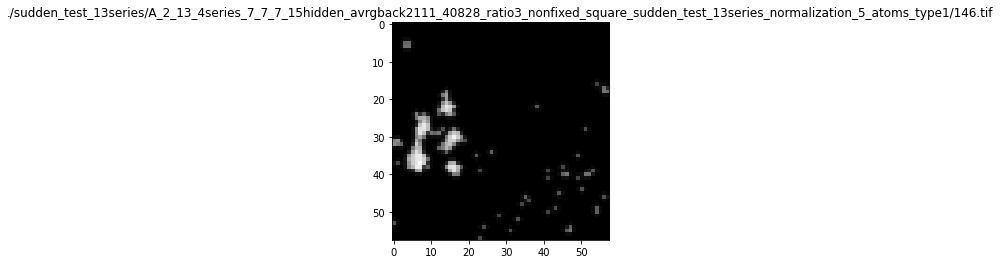

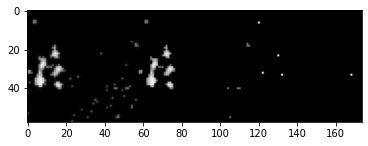

 54%|█████▎    | 83/155 [00:42<00:37,  1.91it/s]

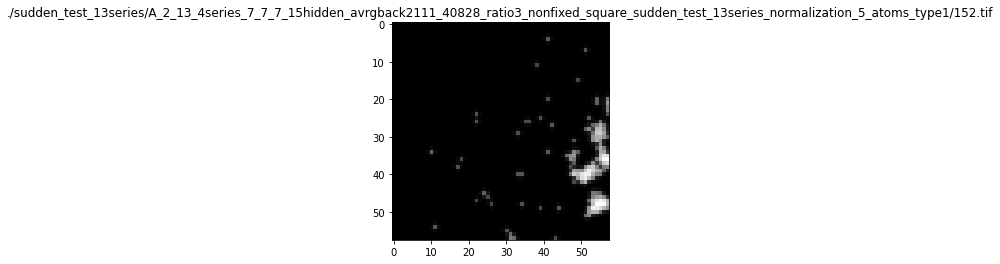

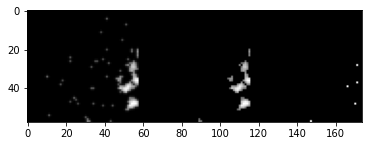

 54%|█████▍    | 84/155 [00:42<00:36,  1.94it/s]

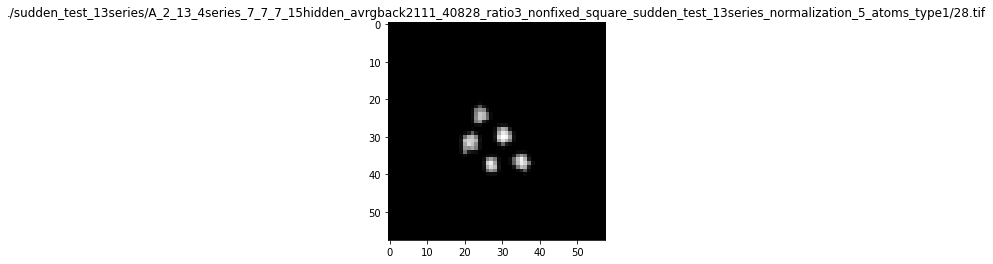

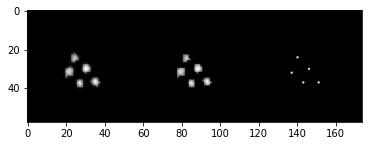

 55%|█████▍    | 85/155 [00:43<00:33,  2.06it/s]

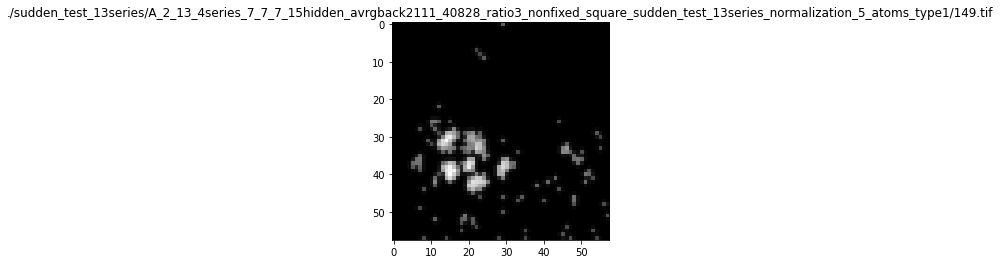

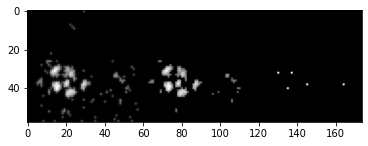

 55%|█████▌    | 86/155 [00:43<00:35,  1.95it/s]

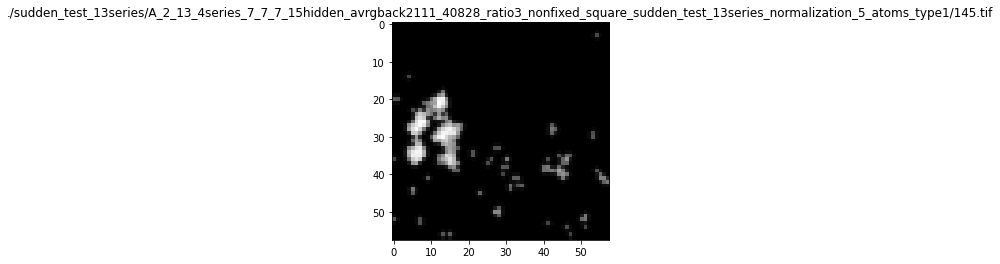

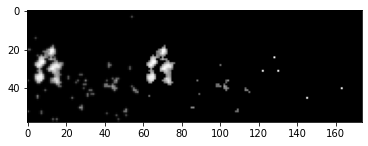

 56%|█████▌    | 87/155 [00:44<00:39,  1.74it/s]

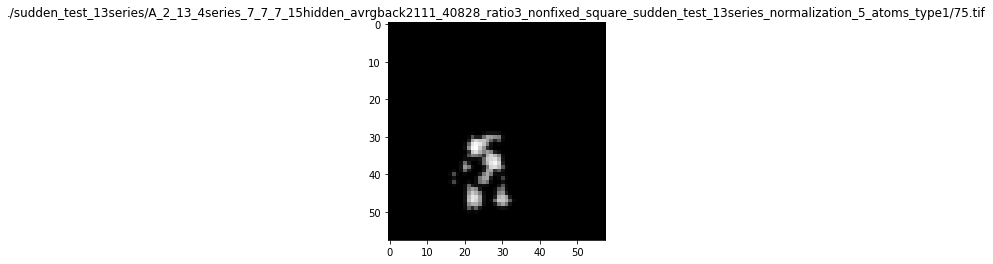

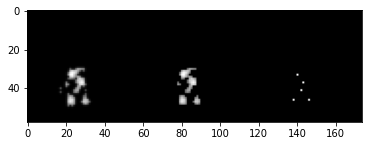

 57%|█████▋    | 88/155 [00:44<00:36,  1.82it/s]

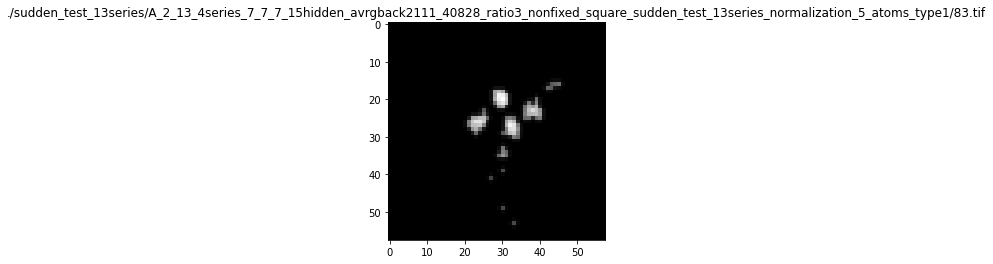

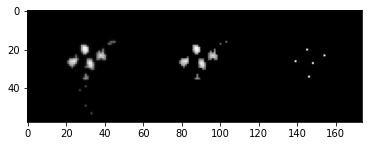

 57%|█████▋    | 89/155 [00:45<00:33,  1.98it/s]

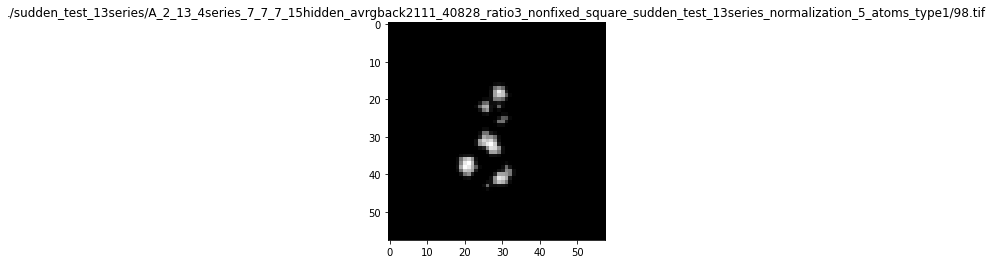

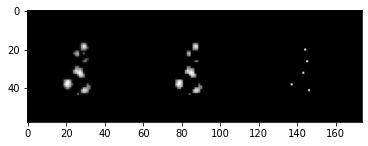

 58%|█████▊    | 90/155 [00:45<00:30,  2.13it/s]

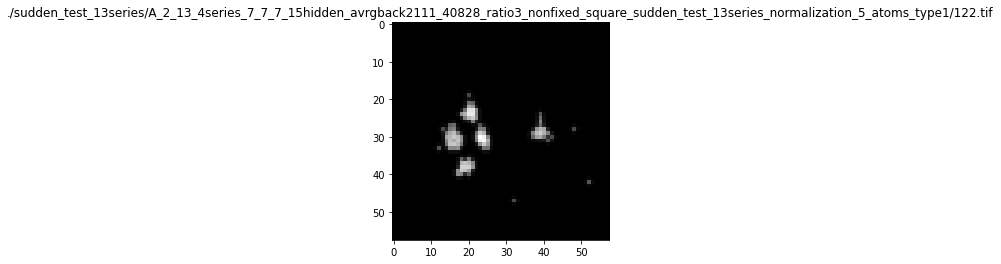

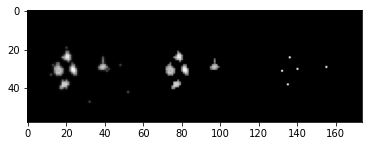

 59%|█████▊    | 91/155 [00:46<00:30,  2.11it/s]

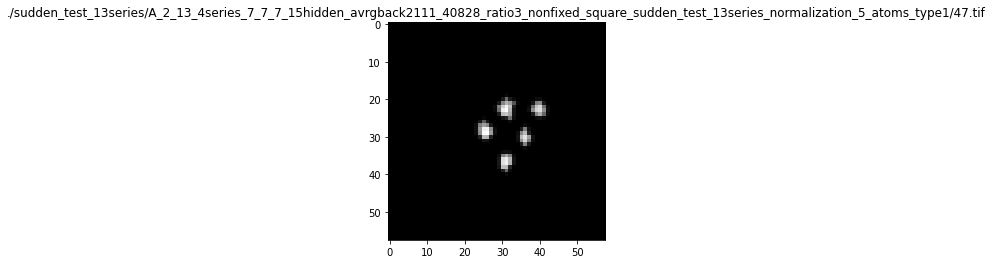

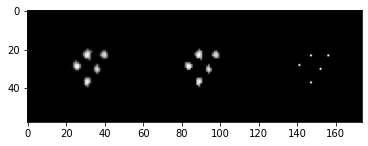

 59%|█████▉    | 92/155 [00:46<00:27,  2.25it/s]

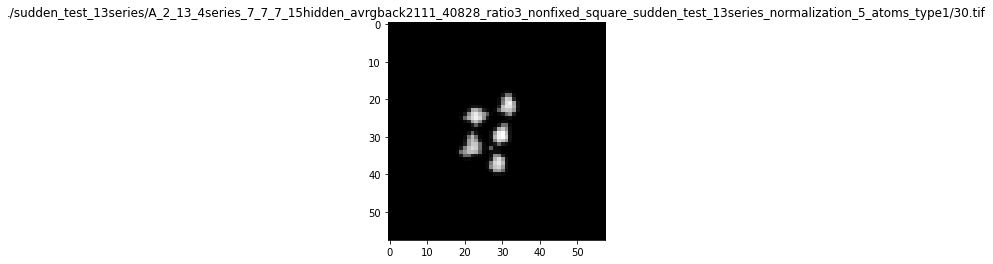

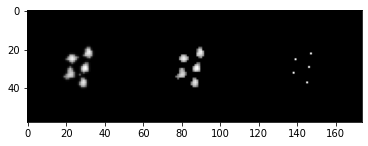

 60%|██████    | 93/155 [00:46<00:27,  2.26it/s]

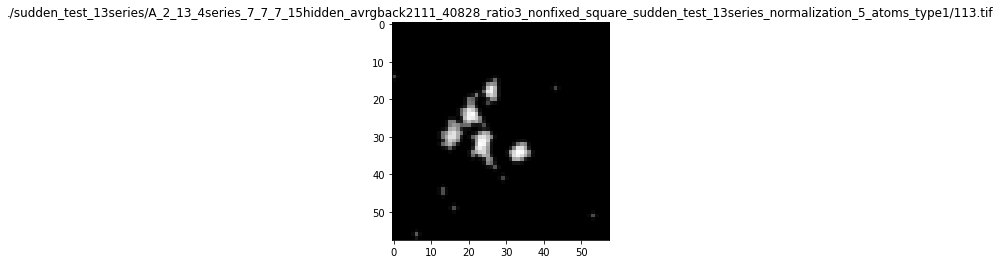

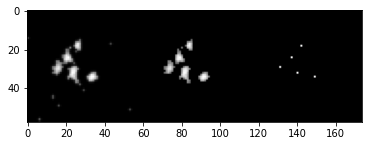

 61%|██████    | 94/155 [00:47<00:28,  2.12it/s]

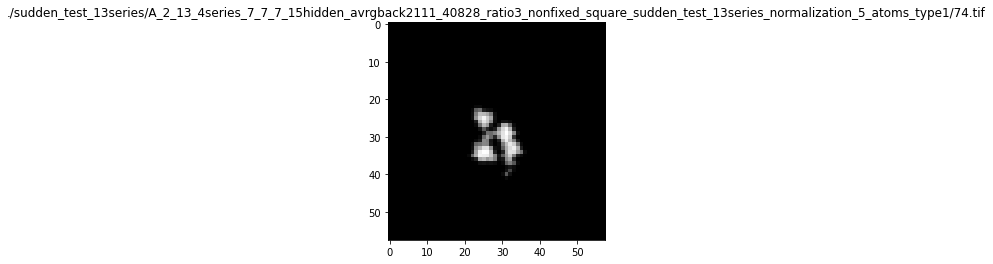

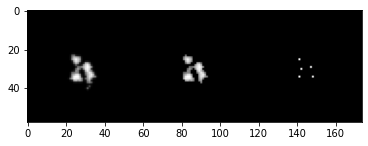

 61%|██████▏   | 95/155 [00:47<00:27,  2.14it/s]

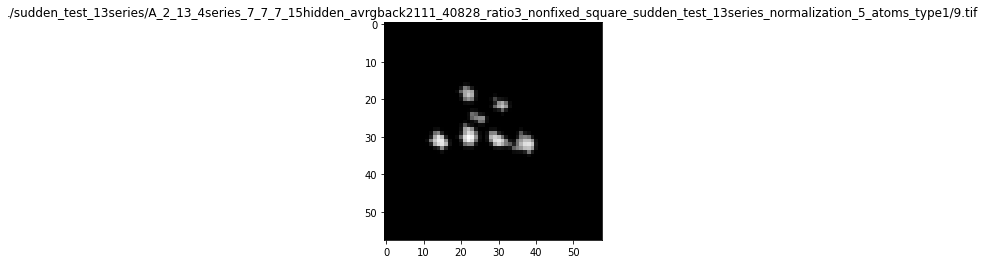

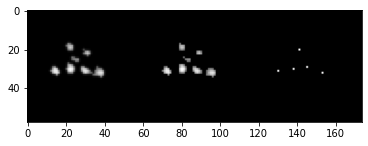

 62%|██████▏   | 96/155 [00:48<00:27,  2.12it/s]

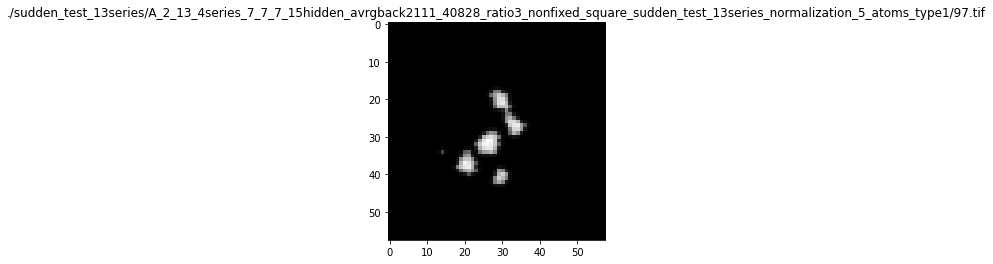

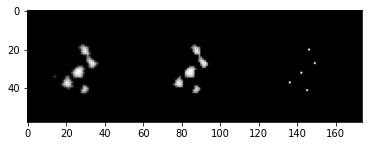

 63%|██████▎   | 97/155 [00:48<00:27,  2.14it/s]

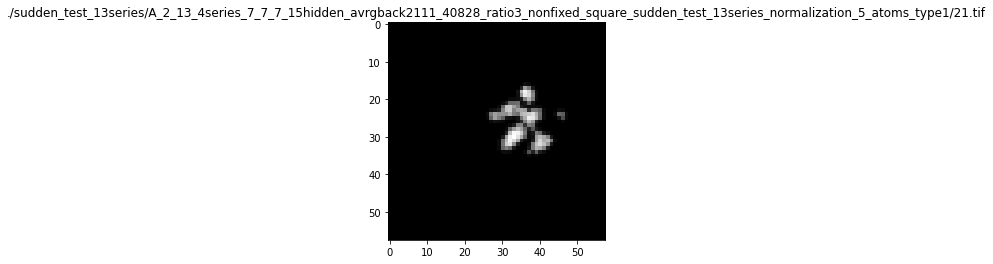

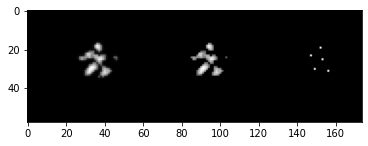

 63%|██████▎   | 98/155 [00:49<00:26,  2.17it/s]

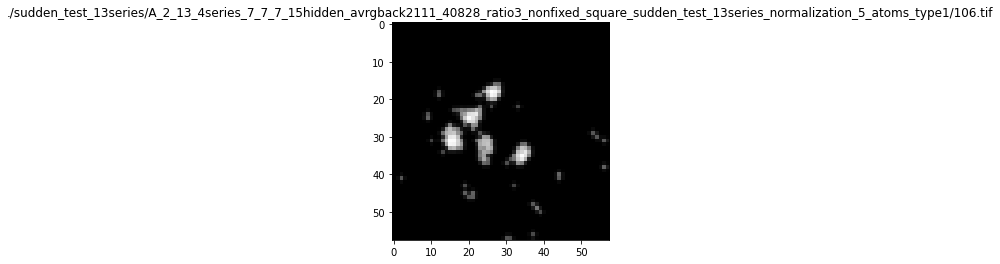

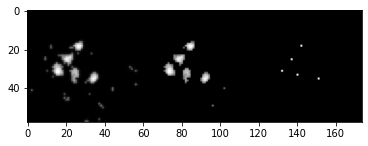

 64%|██████▍   | 99/155 [00:49<00:28,  1.98it/s]

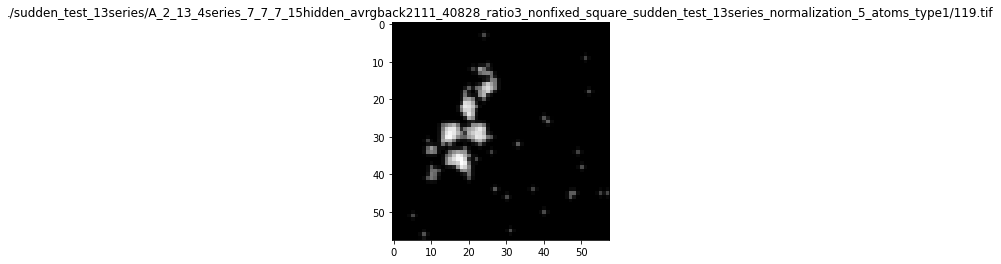

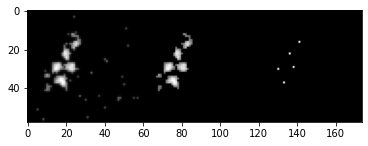

 65%|██████▍   | 100/155 [00:50<00:29,  1.88it/s]

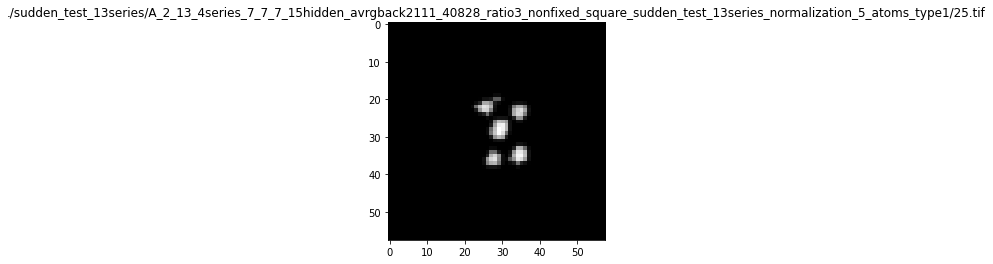

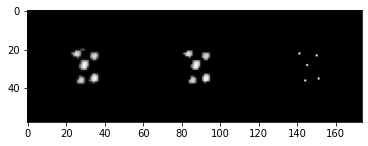

 65%|██████▌   | 101/155 [00:50<00:26,  2.01it/s]

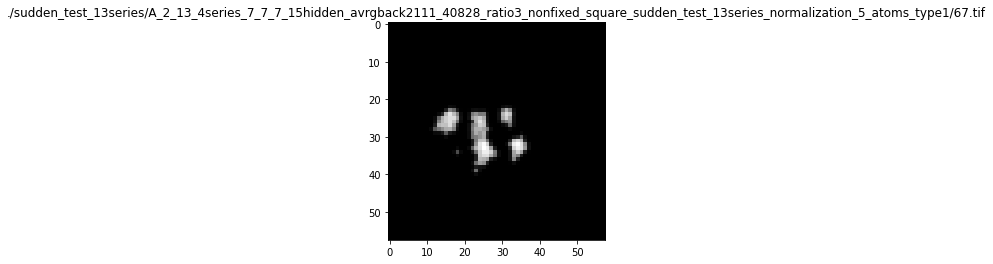

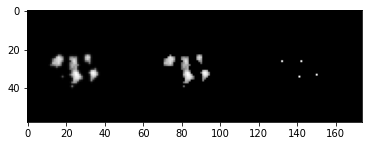

 66%|██████▌   | 102/155 [00:51<00:26,  1.97it/s]

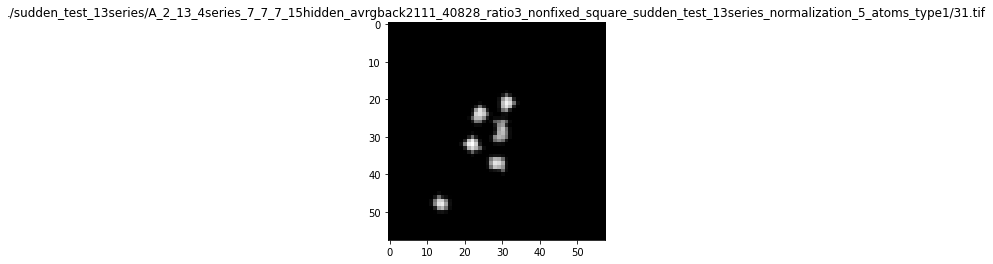

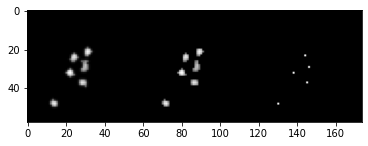

 66%|██████▋   | 103/155 [00:51<00:24,  2.10it/s]

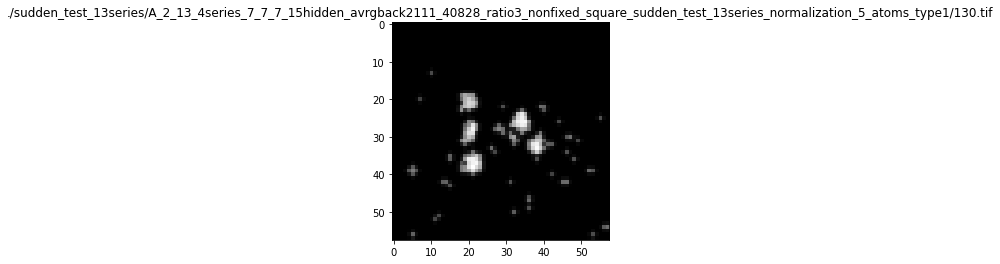

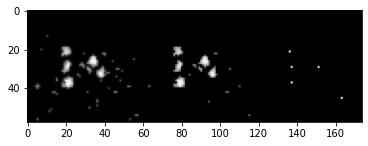

 67%|██████▋   | 104/155 [00:52<00:25,  1.97it/s]

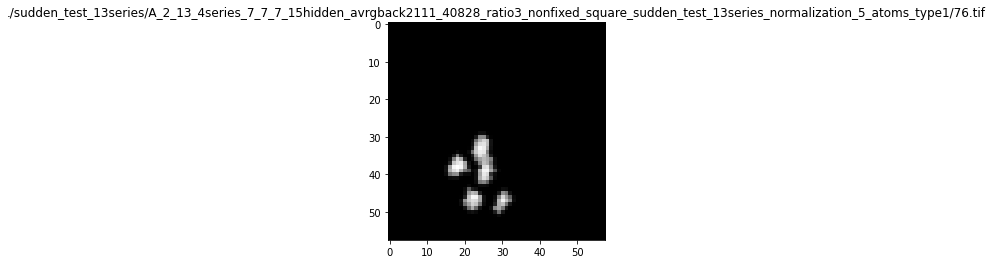

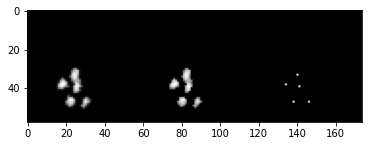

 68%|██████▊   | 105/155 [00:52<00:25,  1.99it/s]

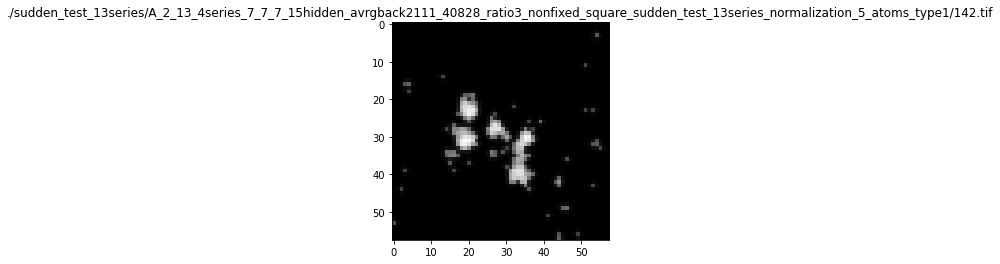

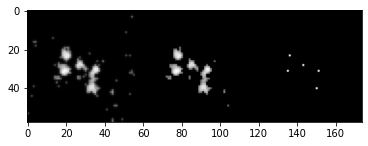

 68%|██████▊   | 106/155 [00:53<00:25,  1.90it/s]

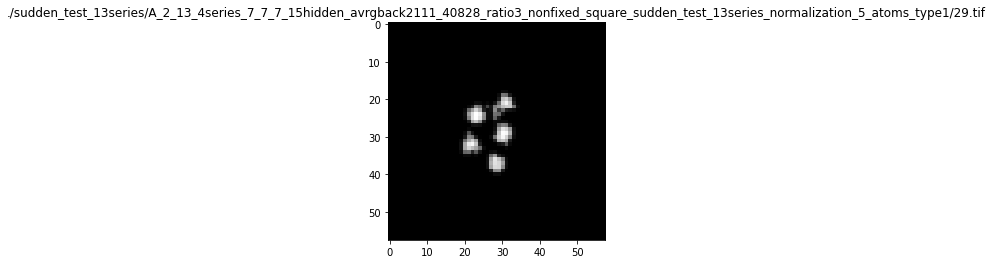

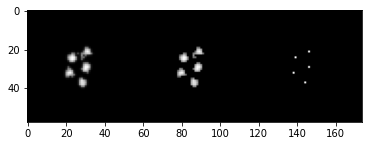

 69%|██████▉   | 107/155 [00:53<00:23,  2.02it/s]

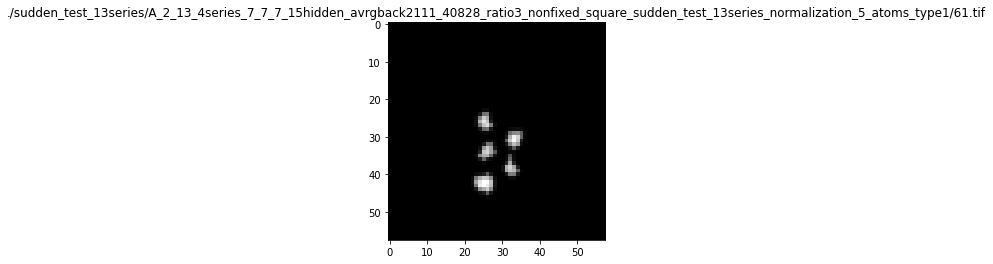

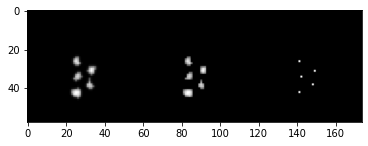

 70%|██████▉   | 108/155 [00:54<00:21,  2.16it/s]

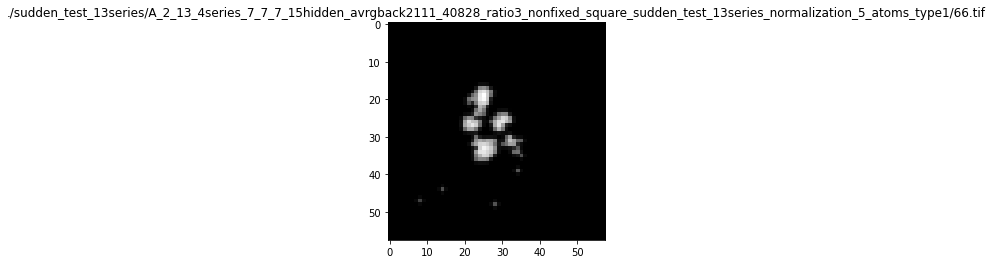

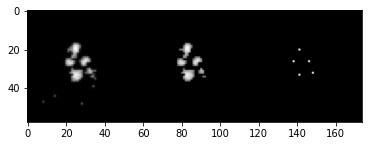

 70%|███████   | 109/155 [00:54<00:23,  1.96it/s]

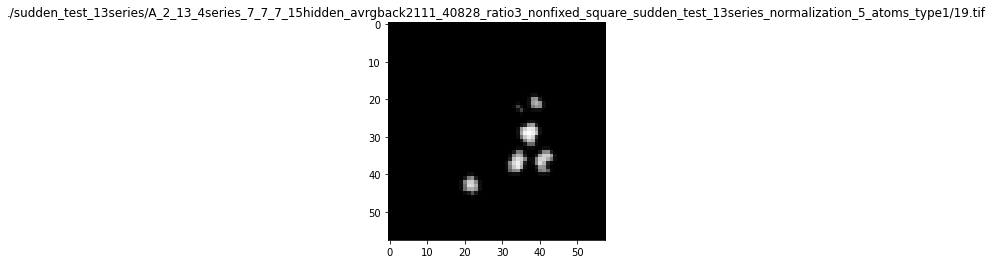

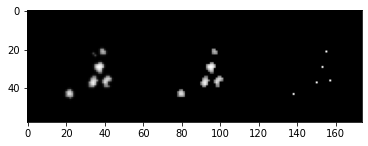

 71%|███████   | 110/155 [00:55<00:21,  2.09it/s]

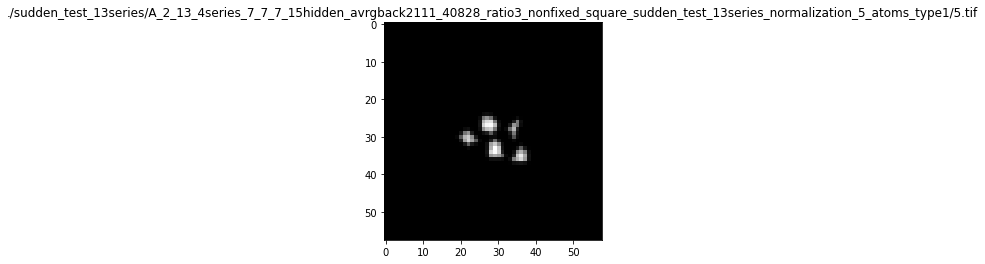

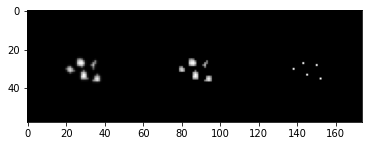

 72%|███████▏  | 111/155 [00:55<00:22,  1.98it/s]

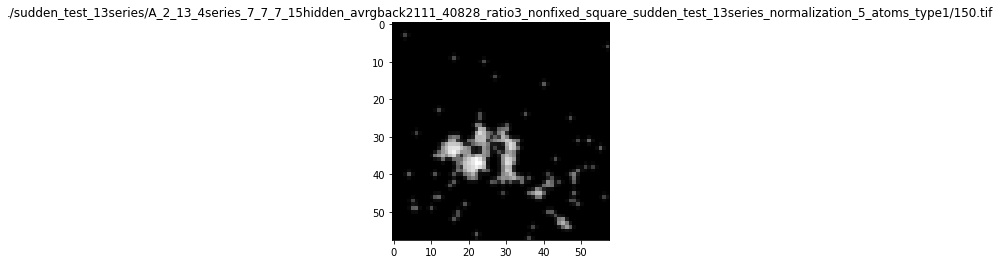

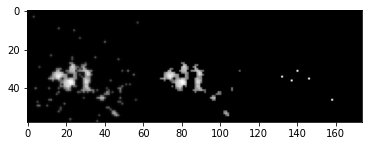

 72%|███████▏  | 112/155 [00:56<00:24,  1.76it/s]

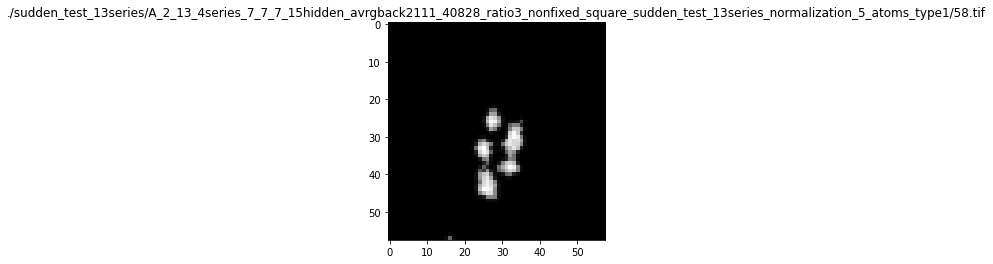

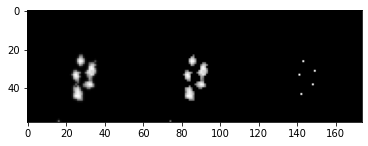

 73%|███████▎  | 113/155 [00:57<00:23,  1.82it/s]

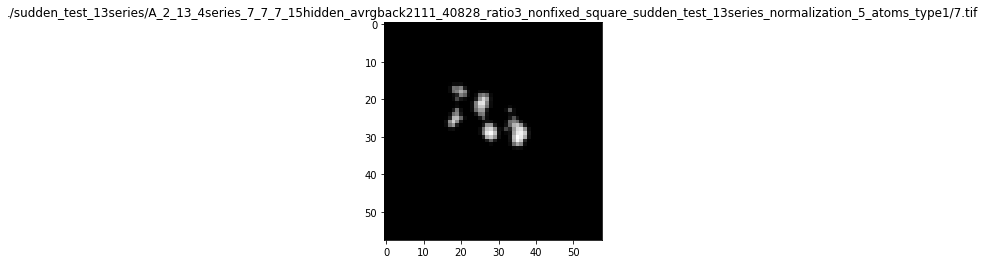

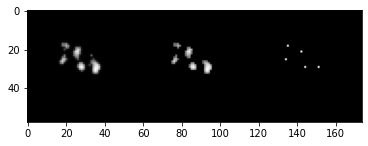

 74%|███████▎  | 114/155 [00:57<00:20,  2.02it/s]

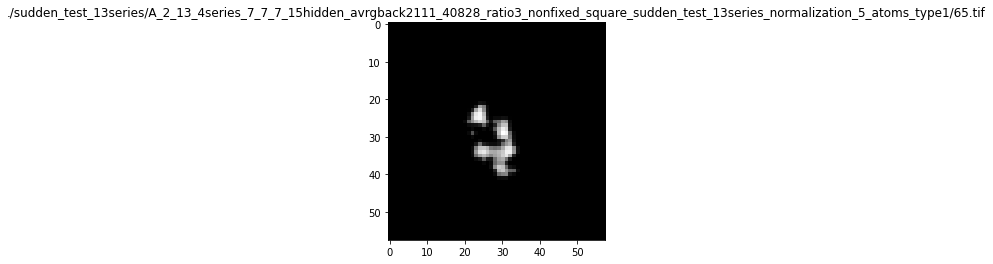

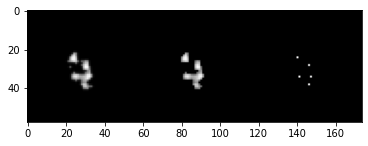

 74%|███████▍  | 115/155 [00:57<00:19,  2.09it/s]

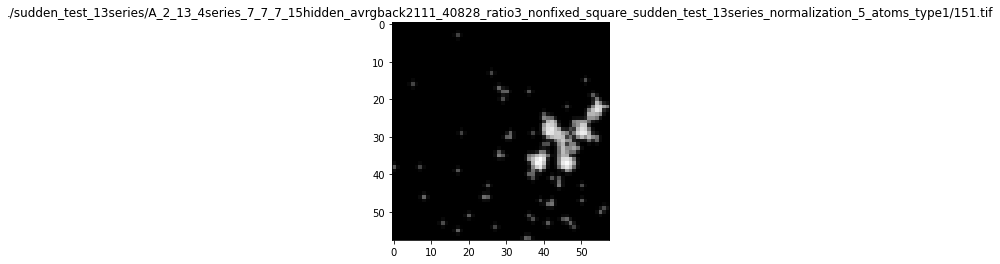

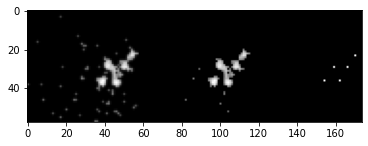

 75%|███████▍  | 116/155 [00:58<00:19,  2.01it/s]

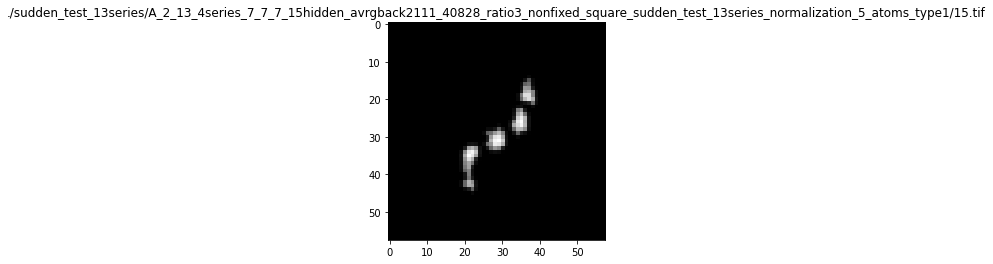

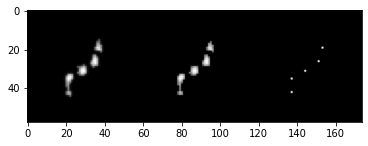

 75%|███████▌  | 117/155 [00:58<00:18,  2.04it/s]

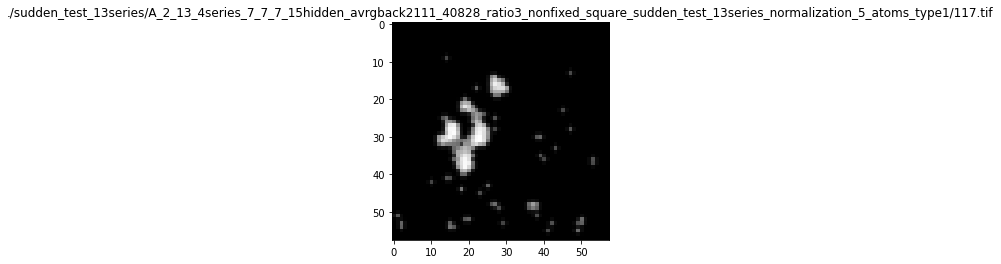

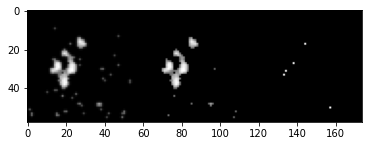

 76%|███████▌  | 118/155 [00:59<00:21,  1.71it/s]

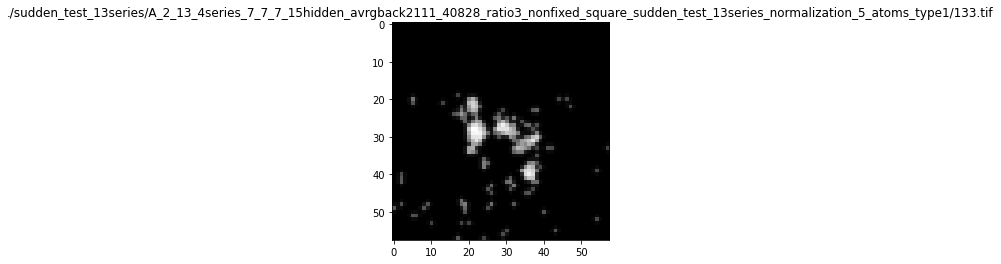

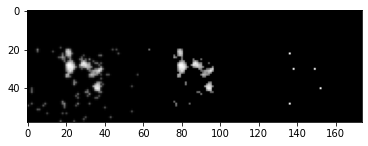

 77%|███████▋  | 119/155 [01:00<00:20,  1.78it/s]

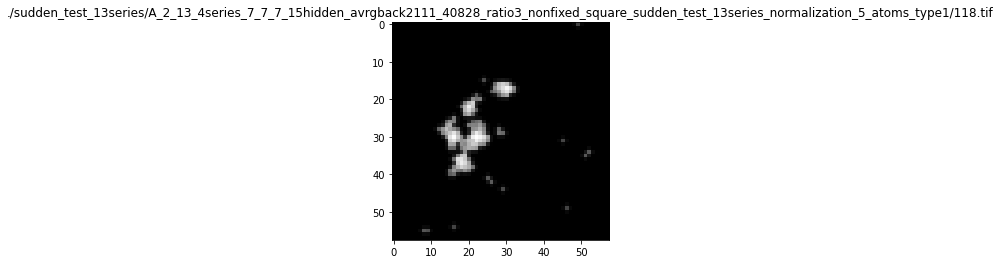

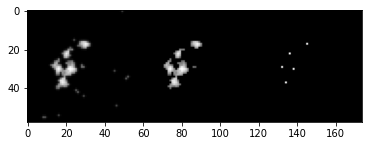

 77%|███████▋  | 120/155 [01:00<00:19,  1.81it/s]

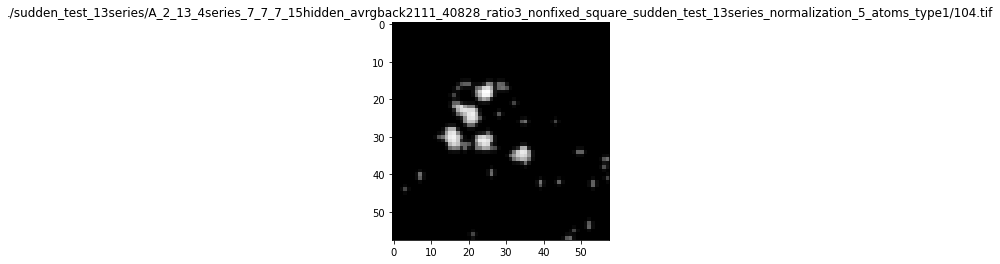

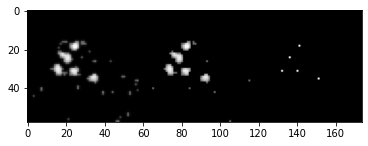

 78%|███████▊  | 121/155 [01:01<00:18,  1.85it/s]

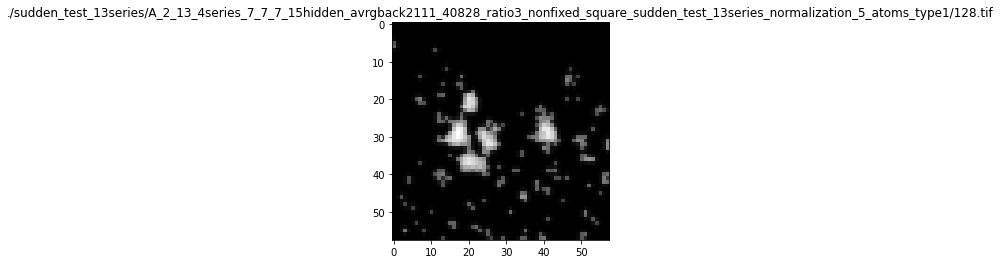

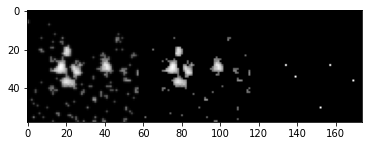

 79%|███████▊  | 122/155 [01:02<00:20,  1.61it/s]

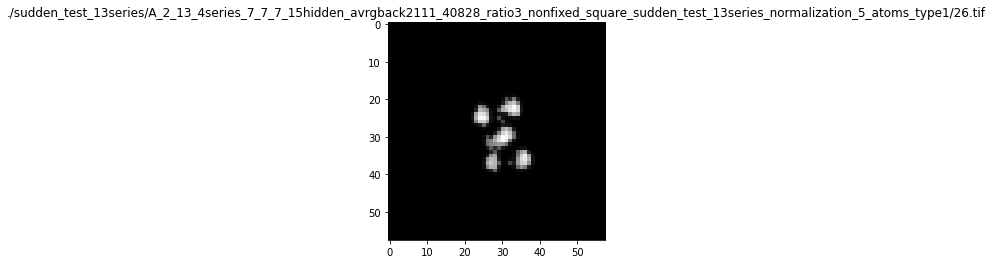

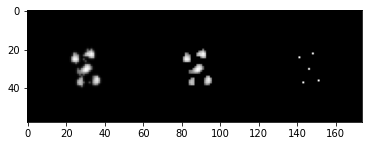

 79%|███████▉  | 123/155 [01:02<00:18,  1.76it/s]

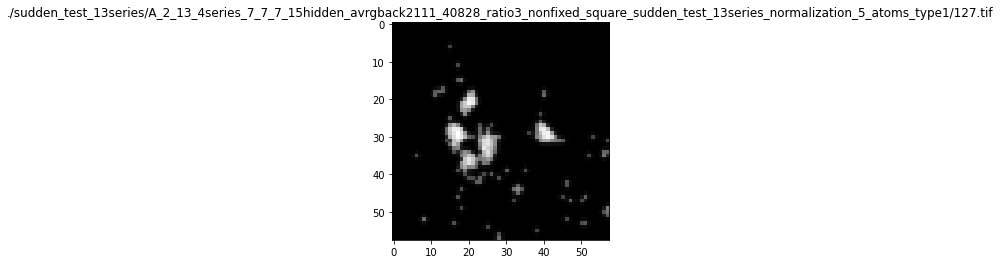

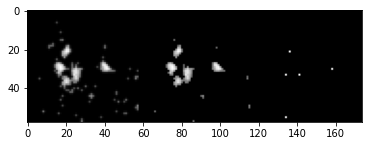

 80%|████████  | 124/155 [01:03<00:18,  1.71it/s]

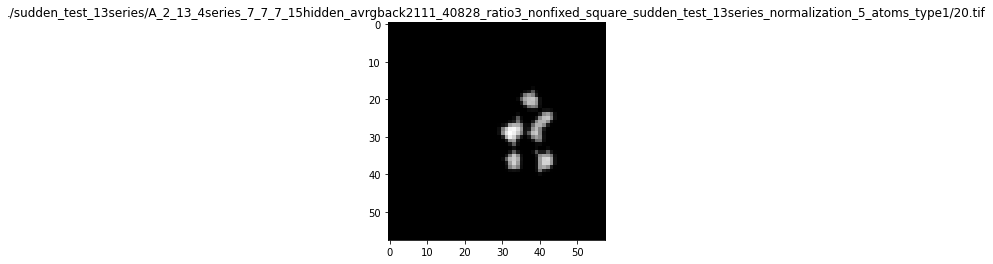

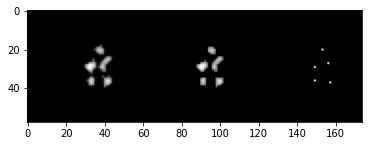

 81%|████████  | 125/155 [01:03<00:16,  1.86it/s]

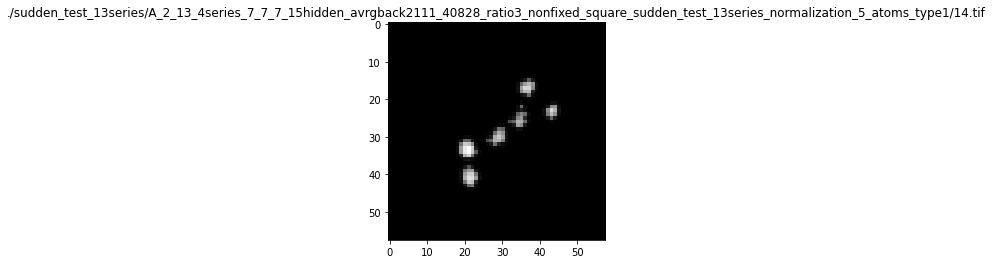

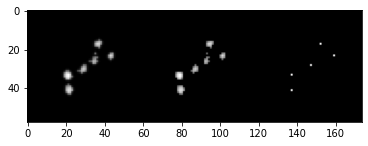

 81%|████████▏ | 126/155 [01:04<00:14,  2.01it/s]

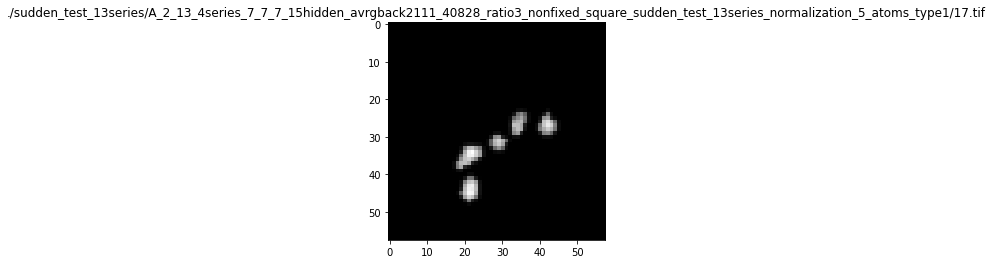

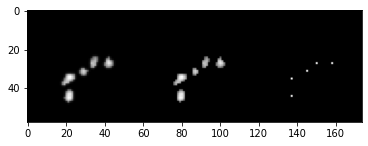

 82%|████████▏ | 127/155 [01:04<00:14,  1.87it/s]

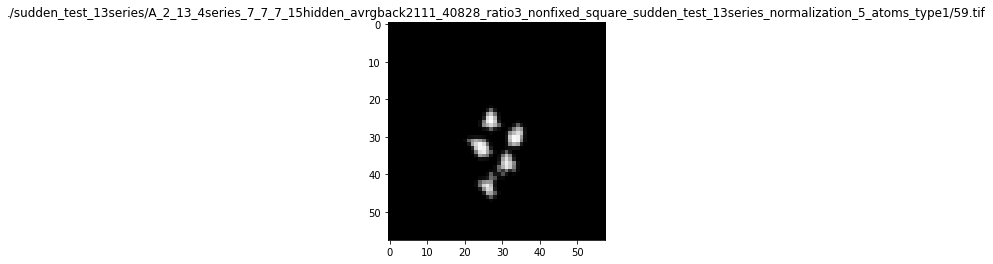

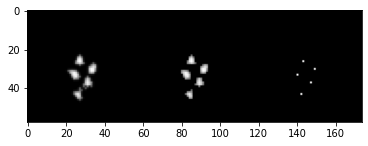

 83%|████████▎ | 128/155 [01:05<00:13,  1.98it/s]

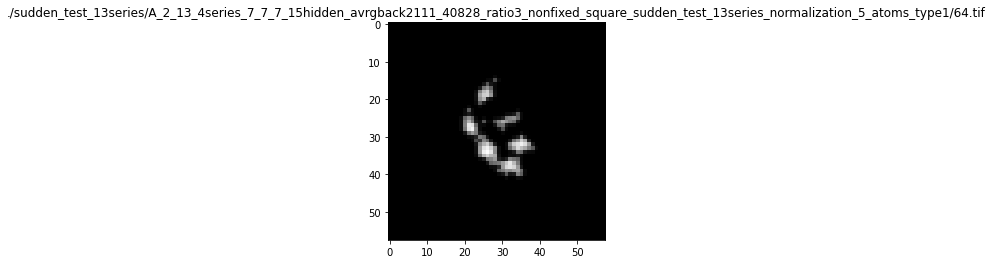

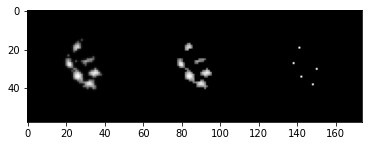

 83%|████████▎ | 129/155 [01:05<00:12,  2.05it/s]

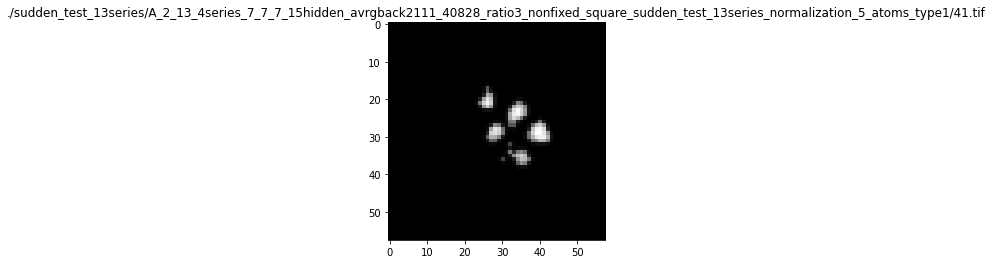

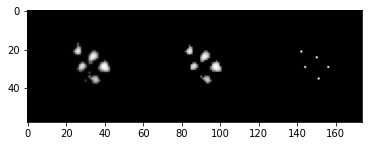

 84%|████████▍ | 130/155 [01:05<00:11,  2.13it/s]

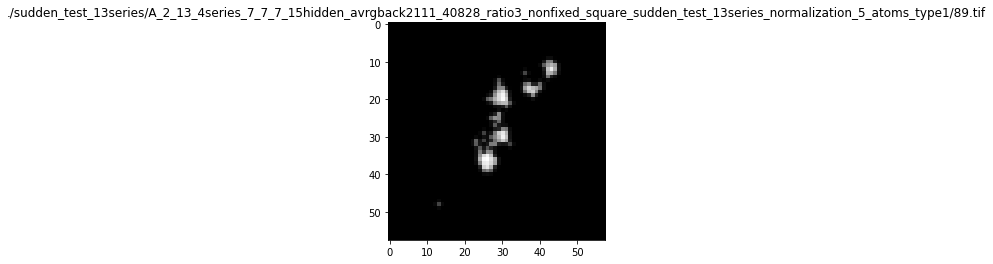

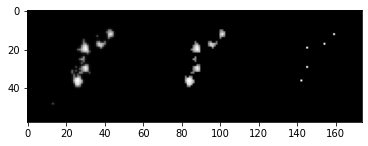

 85%|████████▍ | 131/155 [01:06<00:10,  2.20it/s]

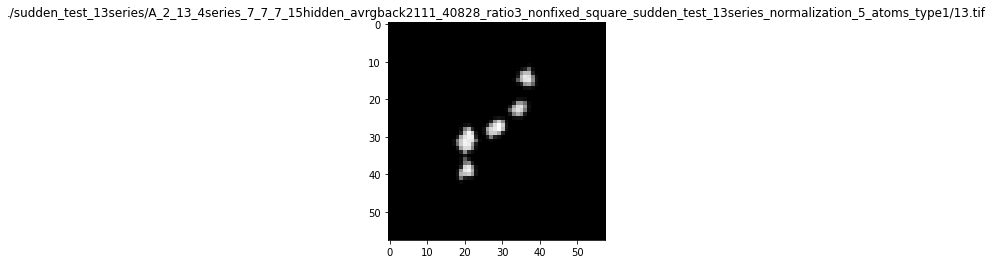

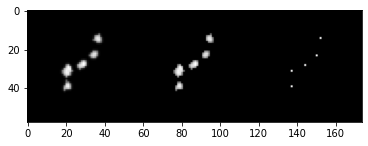

 85%|████████▌ | 132/155 [01:06<00:10,  2.24it/s]

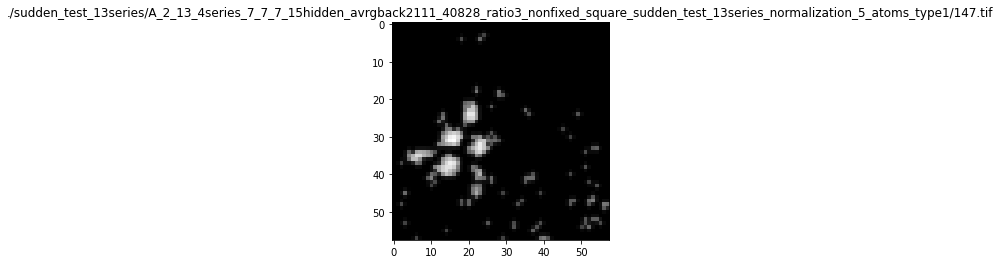

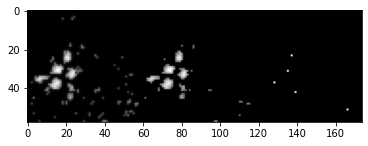

 86%|████████▌ | 133/155 [01:07<00:11,  1.92it/s]

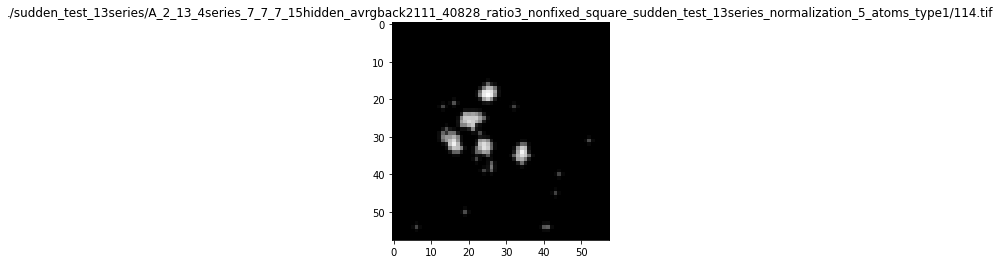

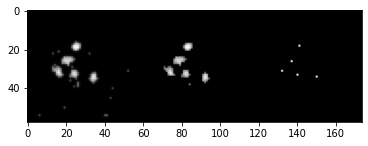

 86%|████████▋ | 134/155 [01:07<00:10,  2.03it/s]

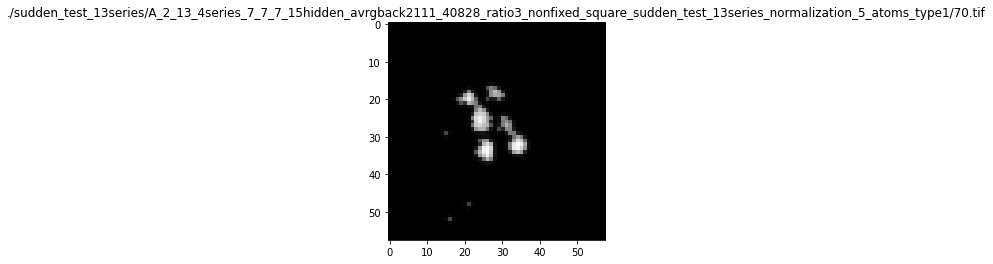

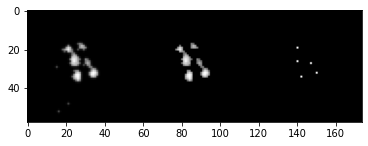

 87%|████████▋ | 135/155 [01:08<00:09,  2.10it/s]

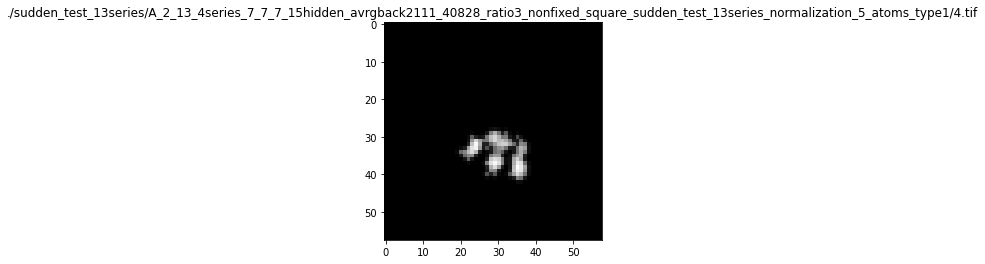

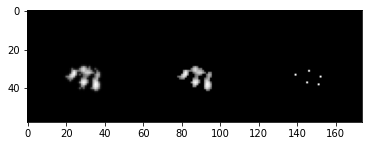

 88%|████████▊ | 136/155 [01:08<00:09,  2.07it/s]

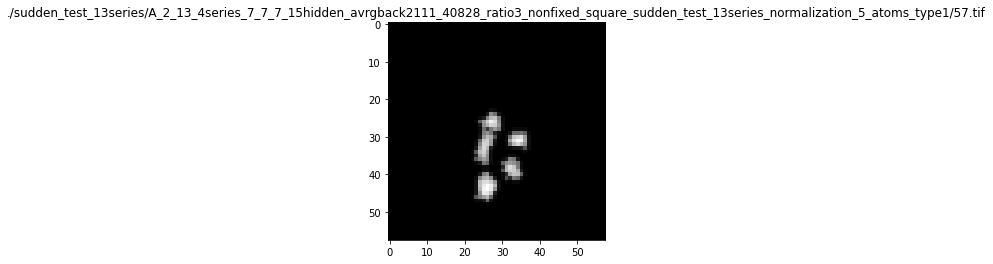

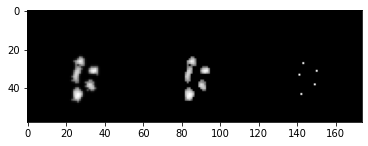

 88%|████████▊ | 137/155 [01:09<00:08,  2.09it/s]

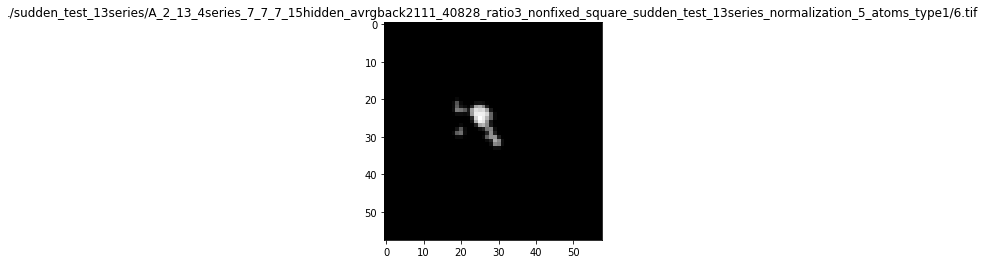

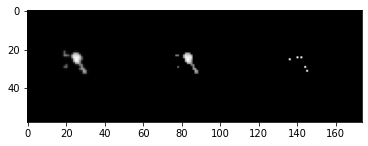

 89%|████████▉ | 138/155 [01:09<00:07,  2.19it/s]

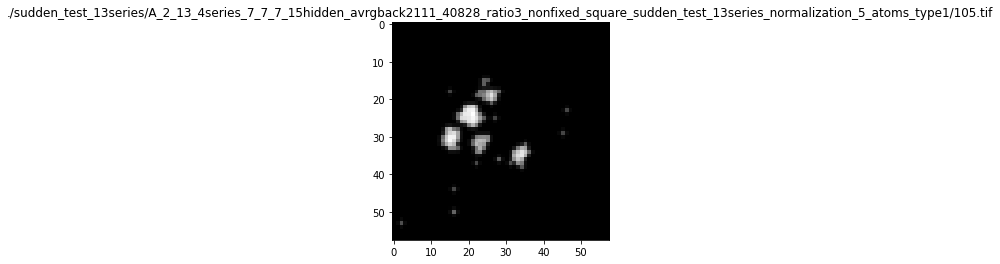

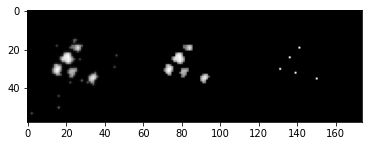

 90%|████████▉ | 139/155 [01:10<00:07,  2.19it/s]

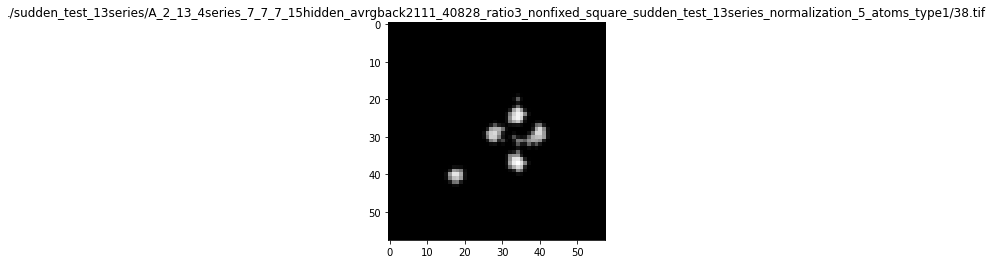

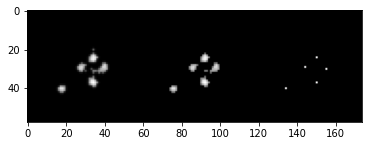

 90%|█████████ | 140/155 [01:10<00:06,  2.25it/s]

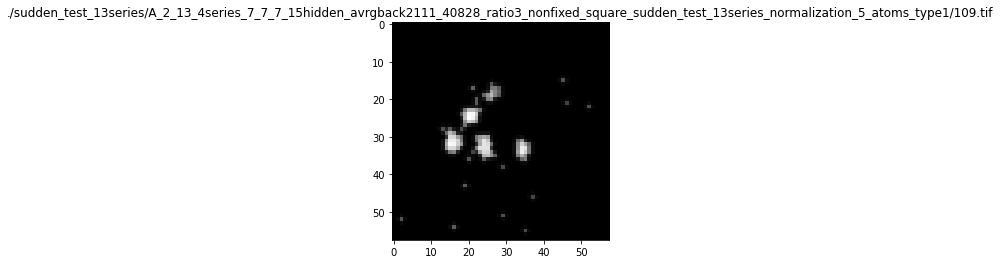

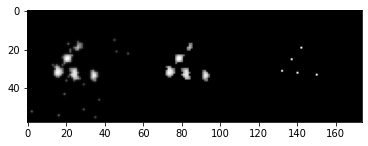

 91%|█████████ | 141/155 [01:11<00:06,  2.27it/s]

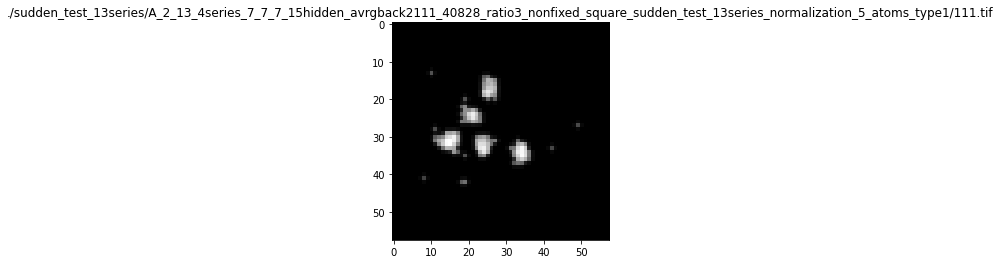

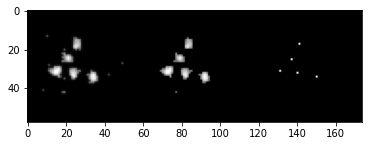

 92%|█████████▏| 142/155 [01:11<00:05,  2.17it/s]

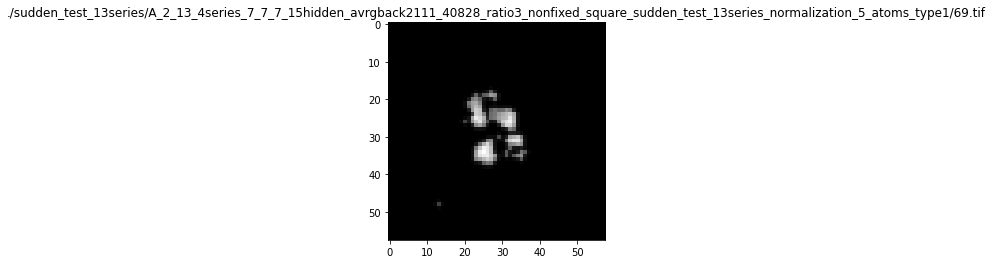

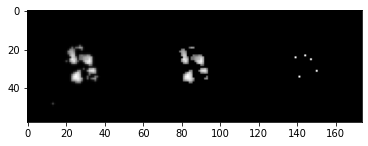

 92%|█████████▏| 143/155 [01:12<00:05,  2.17it/s]

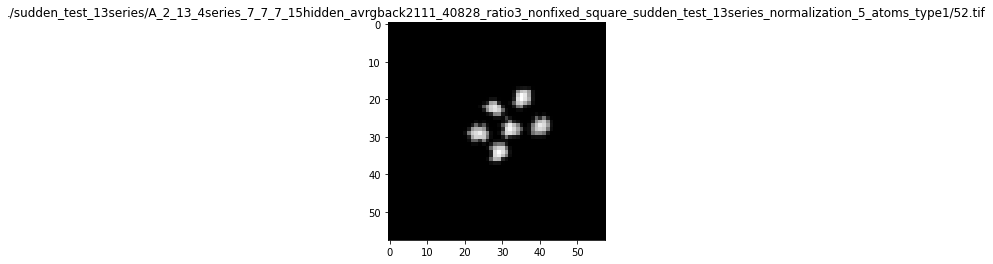

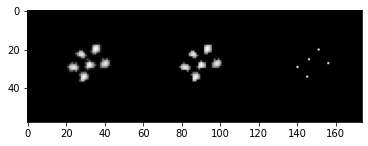

 93%|█████████▎| 144/155 [01:12<00:05,  2.14it/s]

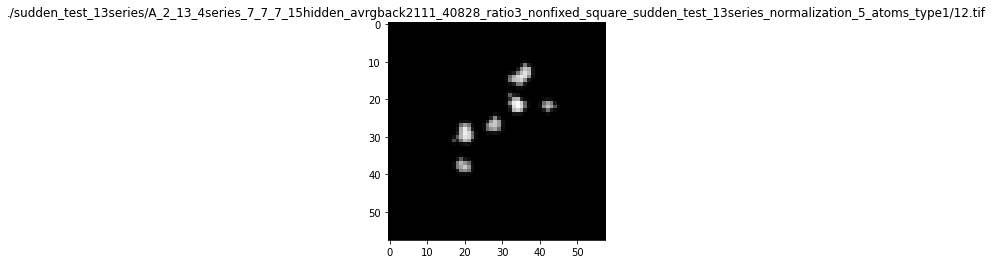

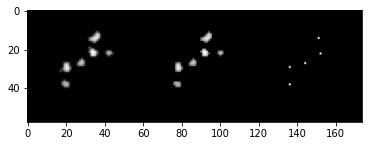

 94%|█████████▎| 145/155 [01:12<00:04,  2.15it/s]

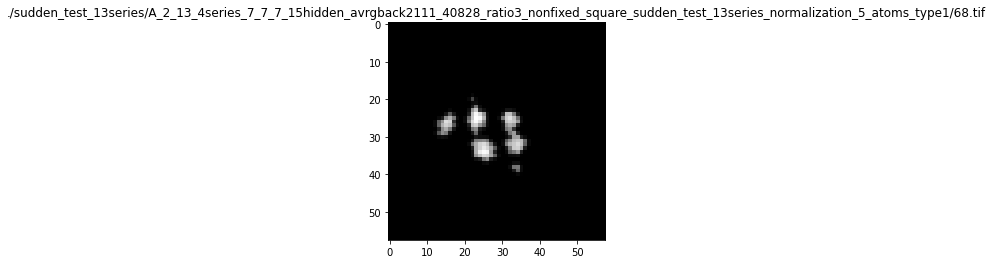

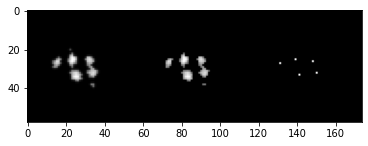

 94%|█████████▍| 146/155 [01:13<00:04,  2.14it/s]

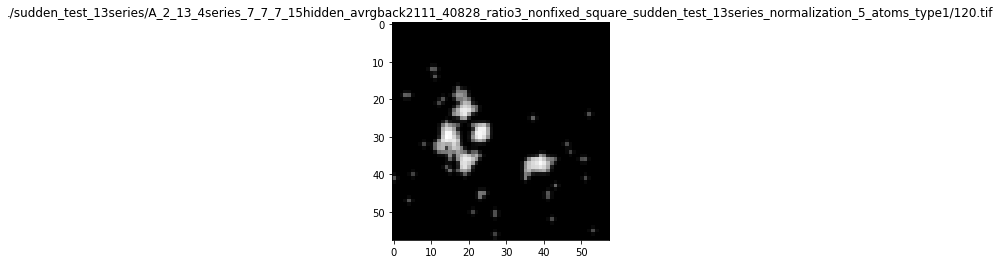

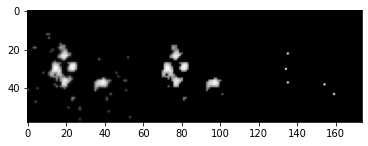

 95%|█████████▍| 147/155 [01:14<00:04,  1.86it/s]

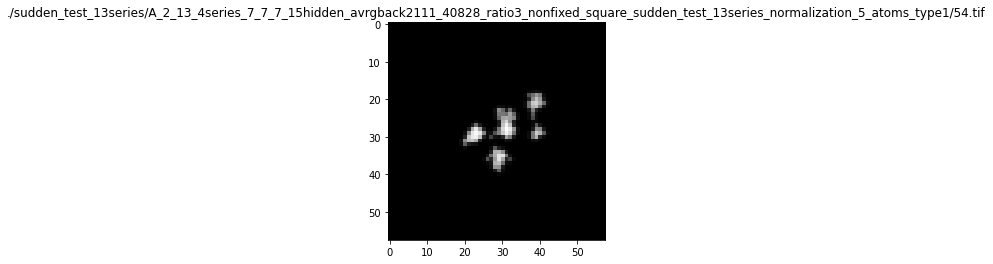

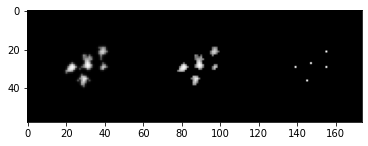

 95%|█████████▌| 148/155 [01:14<00:03,  1.99it/s]

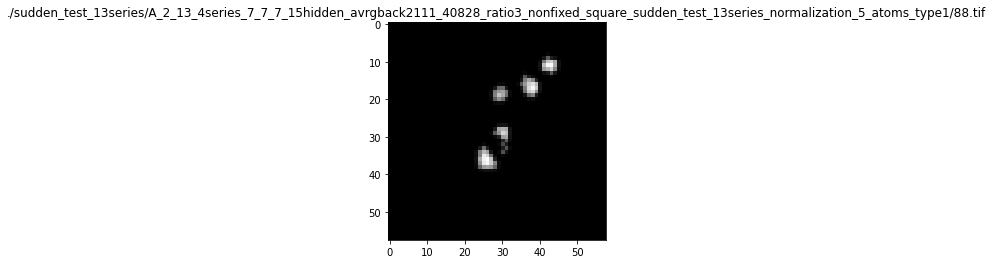

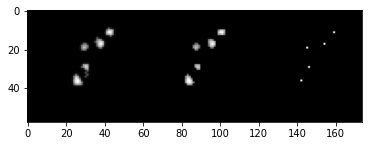

 96%|█████████▌| 149/155 [01:14<00:02,  2.13it/s]

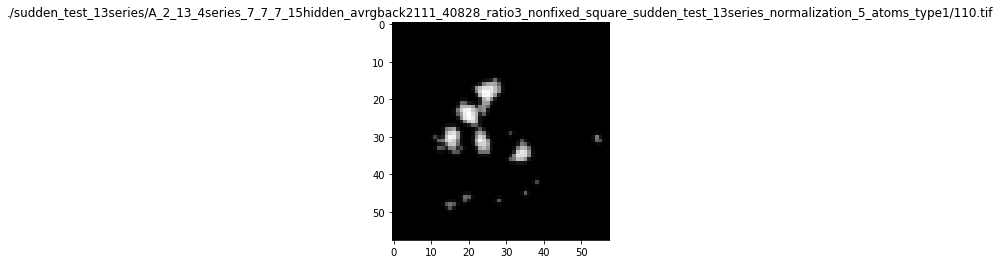

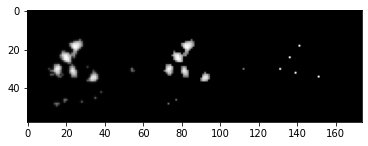

 97%|█████████▋| 150/155 [01:15<00:02,  2.06it/s]

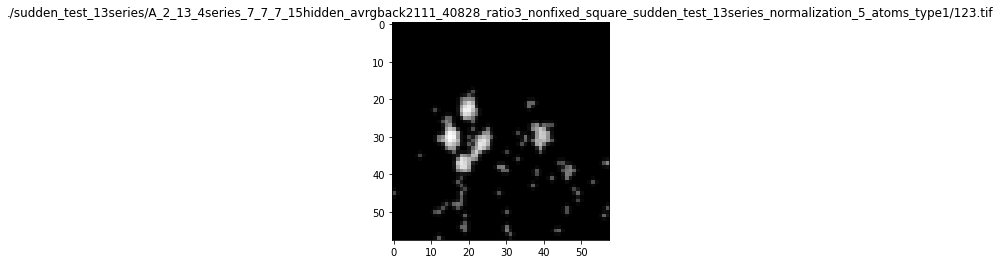

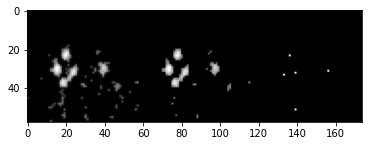

 97%|█████████▋| 151/155 [01:16<00:02,  1.79it/s]

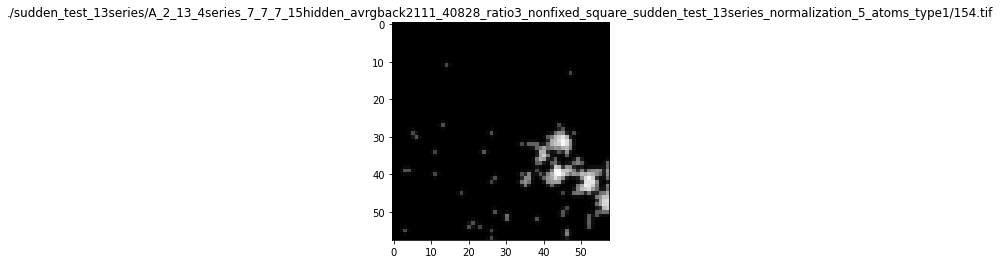

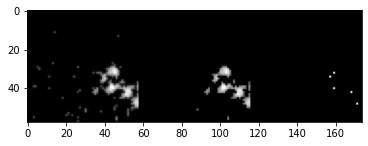

 98%|█████████▊| 152/155 [01:16<00:01,  1.78it/s]

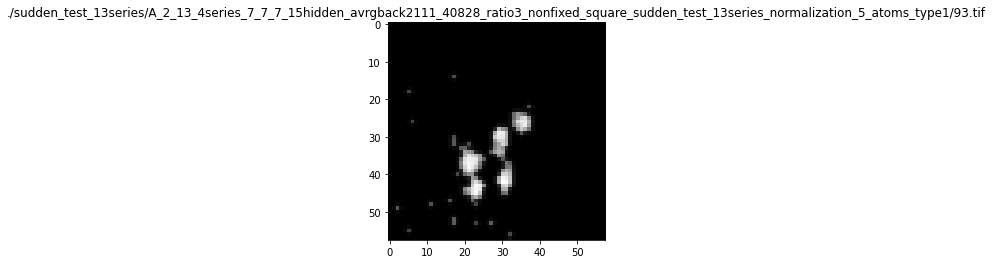

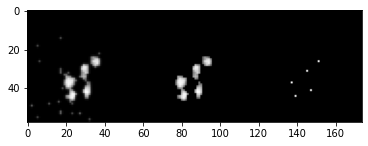

 99%|█████████▊| 153/155 [01:17<00:01,  1.80it/s]

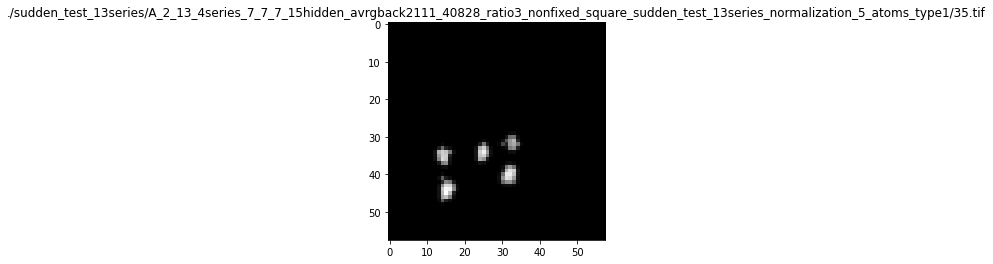

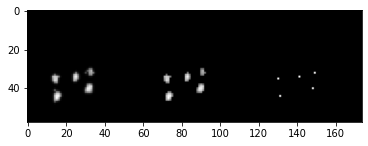

 99%|█████████▉| 154/155 [01:17<00:00,  1.92it/s]

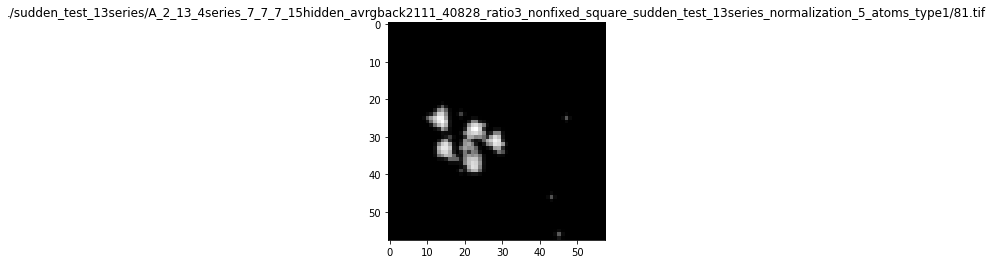

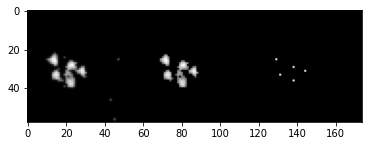

100%|██████████| 155/155 [01:18<00:00,  1.98it/s]

finished time :  Thu Sep 22 17:36:57 2022


In [8]:
#### block 4 ####
print('start time : ',time.asctime( time.localtime(time.time()) ))
# files=glob('./reborn_result/430_4_7_7_5_10hidden_1720_19th_nor_28000_series/*.tif')
# files=glob('./average_times/A_2_16_3series_7_7_7_20hidden_avrgback2334_39378_ratio3_circle_normalization_5_atoms_type1/*.tif')
#### files: folder name of the input of GMM ####
files=glob('./sudden_test_13series/A_2_13_4series_7_7_7_15hidden_avrgback2111_40828_ratio3_nonfixed_square_sudden_test_13series_normalization_5_atoms_type1/*.tif')
for f in tqdm(files):
#### num_models: number of atoms in STEM image #######
    atoms_detection(f,num_models=5)
#     if f.split('/')[-1] in w:
#         atoms_detection(f,num_models=6)
#     else:
#         atoms_detection(f,num_models=5)
print('finished time : ',time.asctime( time.localtime(time.time())))  

In [10]:
w=['./point_result/6.tif',
 './point_result/9.tif',
 './point_result/12.tif',
 './point_result/14.tif',
 './point_result/30.tif',
 './point_result/31.tif',
 './point_result/49.tif',
 './point_result/50.tif',
 './point_result/52.tif',
 './point_result/53.tif',
 './point_result/60.tif',
 './point_result/62.tif',
 './point_result/63.tif',
 './point_result/64.tif',
 './point_result/69.tif',
 './point_result/70.tif',
 './point_result/73.tif',
 './point_result/74.tif',
 './point_result/75.tif',
 './point_result/77.tif',
 './point_result/83.tif',
 './point_result/85.tif',
 './point_result/101.tif',
 './point_result/102.tif',
 './point_result/117.tif']

In [11]:
for i in range(len(w)):
    w[i]=w[i].split('/')[-1]

In [25]:
w

['6.tif',
 '12.tif',
 '14.tif',
 '30.tif',
 '31.tif',
 '49.tif',
 '50.tif',
 '52.tif',
 '60.tif',
 '62.tif',
 '63.tif',
 '64.tif',
 '69.tif',
 '70.tif',
 '73.tif',
 '74.tif',
 '75.tif',
 '77.tif',
 '83.tif',
 '85.tif',
 '101.tif',
 '102.tif',
 '117.tif']